In [1]:
#  par défaut l'encoding est en utf-8 pour python 3
# coding: utf-8

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import re
import time
from datetime import date

In [2]:
# Cellule pour indentifier les versions des packages à inclure dans 'requirements.txt'
# import sklearn as sk
# print(np.__version__)   # 1.19.5
# print(pd.__version__)   # 1.2.4
# print(sk.__version__)   # 0.23.2

In [2]:
# Changer la taille de police par défaut
# plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_row', 1001)
pd.set_option('display.max_column', 400)
# pd.set_option('display.column_space', 200)
# pd.set_option('display.width', 10000)

In [5]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 50

## BASE de DONNEES

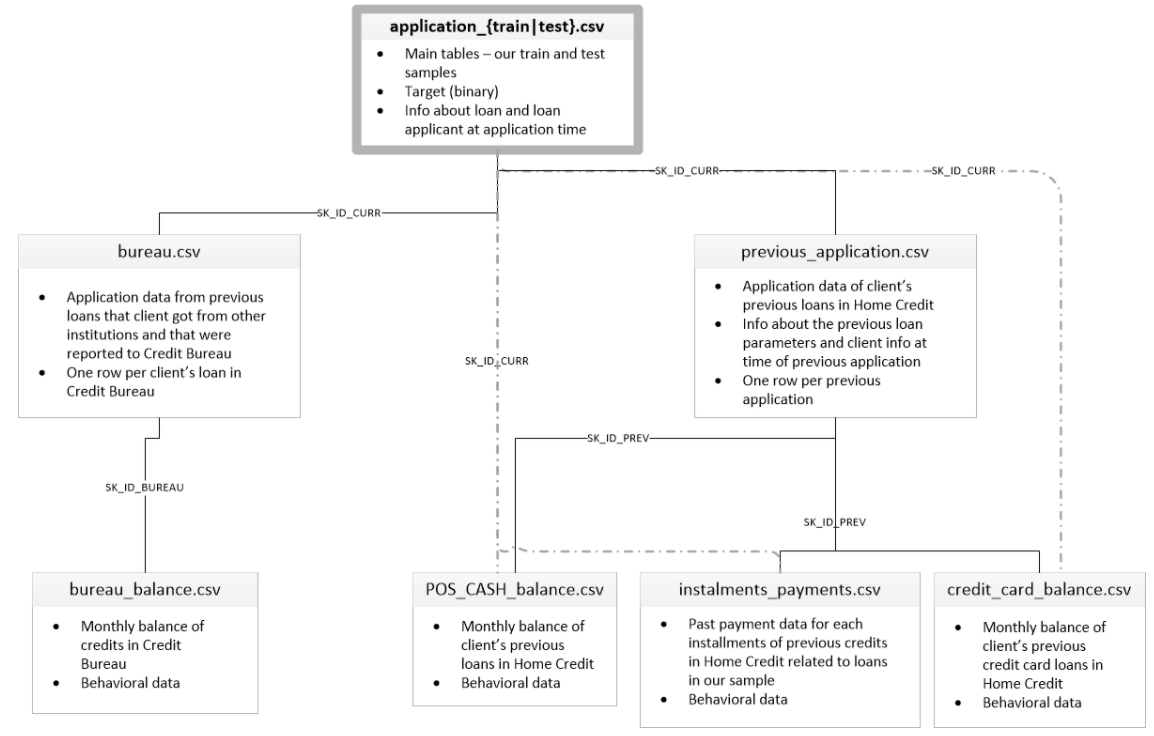

In [41]:
from IPython.display import Image
Image(filename='columns_description.png', width=1000, height=1000)

# Chargement des données

In [3]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
previous_application = pd.read_csv("previous_application.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Description des données

In [5]:
nom_df = ['application_train',
          'application_test',
          'bureau',
          'bureau_balance',
          'previous_application',
          'POS_CASH_balance',
          'installments_payments',
          'credit_card_balance',
          'sample_submission']

list_df = [application_train,
           application_test,
           bureau,
           bureau_balance,
           previous_application,
           POS_CASH_balance,
           installments_payments,
           credit_card_balance,
           sample_submission]

In [6]:
i = 0
for df in list_df:
    print("*****************************************")
    print("       ", nom_df[i])
    print("*****************************************")
    i = i + 1
    #print("Variables: ", df.columns)
    print("Population / Nb_variables : ", df.shape)
    print("Doublons :", df.duplicated().sum())
    print("% NaN    :", (df.isna().sum().sum() / df.shape[0]/df.shape[1])*100, '\n')
    

*****************************************
        application_train
*****************************************
Population / Nb_variables :  (307511, 122)
Doublons : 0
% NaN    : 24.39594190712943 

*****************************************
        application_test
*****************************************
Population / Nb_variables :  (48744, 121)
Doublons : 0
% NaN    : 23.81168676153234 

*****************************************
        bureau
*****************************************
Population / Nb_variables :  (1716428, 17)
Doublons : 0
% NaN    : 13.502552290879322 

*****************************************
        bureau_balance
*****************************************
Population / Nb_variables :  (27299925, 3)
Doublons : 0
% NaN    : 0.0 

*****************************************
        previous_application
*****************************************
Population / Nb_variables :  (1670214, 37)
Doublons : 0
% NaN    : 17.97687747344498 

*****************************************

In [7]:
i = 0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
liste_nan = []

for df in list_df:

    for column in df.columns:
        liste_indices.append(nom_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        liste_nan.append(df[column].isna().sum())
    i += 1
resume_data = pd.DataFrame([liste_indices,
                            liste_colonnes,
                            liste_types,
                            liste_uniques,
                            liste_nan]
                           ).T
resume_data.columns = ['Fichier', 'Nom variable', 'Type',
                       'Valeurs uniques', 'Valeurs nan']
resume_data

Fichier                  Nom variable     Type  \
0        application_train                    SK_ID_CURR    int64   
1        application_train                        TARGET    int64   
2        application_train            NAME_CONTRACT_TYPE   object   
3        application_train                   CODE_GENDER   object   
4        application_train                  FLAG_OWN_CAR   object   
5        application_train               FLAG_OWN_REALTY   object   
6        application_train                  CNT_CHILDREN    int64   
7        application_train              AMT_INCOME_TOTAL  float64   
8        application_train                    AMT_CREDIT  float64   
9        application_train                   AMT_ANNUITY  float64   
10       application_train               AMT_GOODS_PRICE  float64   
11       application_train               NAME_TYPE_SUITE   object   
12       application_train              NAME_INCOME_TYPE   object   
13       application_train           NAME_EDUCATION_TYPE   object   
14       application_train            NAME_FAMILY_STATUS   object   
15       application_train             NAME_HOUSING_TYPE   object   
16       application_train    REGION_POPULATION_RELATIVE  float64   
17       application_train                    DAYS_BIRTH    int64   
18       application_train                 DAYS_EMPLOYED    int64   
19       application_train             DAYS_REGISTRATION  float64   
20       application_train               DAYS_ID_PUBLISH    int64   
21       application_train                   OWN_CAR_AGE  float64   
22       application_train                    FLAG_MOBIL    int64   
23       application_train                FLAG_EMP_PHONE    int64   
24       application_train               FLAG_WORK_PHONE    int64   
25       application_train              FLAG_CONT_MOBILE    int64   
26       application_train                    FLAG_PHONE    int64   
27       application_train                    FLAG_EMAIL    int64   
28       application_train               OCCUPATION_TYPE   object   
29       application_train               CNT_FAM_MEMBERS  float64   
30       application_train          REGION_RATING_CLIENT    int64   
31       application_train   REGION_RATING_CLIENT_W_CITY    int64   
32       application_train    WEEKDAY_APPR_PROCESS_START   object   
33       application_train       HOUR_APPR_PROCESS_START    int64   
34       application_train    REG_REGION_NOT_LIVE_REGION    int64   
35       application_train    REG_REGION_NOT_WORK_REGION    int64   
36       application_train   LIVE_REGION_NOT_WORK_REGION    int64   
37       application_train        REG_CITY_NOT_LIVE_CITY    int64   
38       application_train        REG_CITY_NOT_WORK_CITY    int64   
39       application_train       LIVE_CITY_NOT_WORK_CITY    int64   
40       application_train             ORGANIZATION_TYPE   object   
41       application_train                  EXT_SOURCE_1  float64   
42       application_train                  EXT_SOURCE_2  float64   
43       application_train                  EXT_SOURCE_3  float64   
44       application_train                APARTMENTS_AVG  float64   
45       application_train              BASEMENTAREA_AVG  float64   
46       application_train   YEARS_BEGINEXPLUATATION_AVG  float64   
47       application_train               YEARS_BUILD_AVG  float64   
48       application_train                COMMONAREA_AVG  float64   
49       application_train                 ELEVATORS_AVG  float64   
50       application_train                 ENTRANCES_AVG  float64   
51       application_train                 FLOORSMAX_AVG  float64   
52       application_train                 FLOORSMIN_AVG  float64   
53       application_train                  LANDAREA_AVG  float64   
54       application_train          LIVINGAPARTMENTS_AVG  float64   
55       application_train                LIVINGAREA_AVG  float64   
56       application_train       NONLIVINGAPARTMENTS_AVG  float64   
57       applicat

## application_train

In [4]:
print(application_train.shape)
application_train.head(10)
application_train.sort_values(['SK_ID_CURR'], ascending = False).head(5)


(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307510      456255       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307510               N             0          157500.0    675000.0   
307509               Y             0          171000.0    370107.0   
307508               Y             0          153000.0    677664.0   
307507               Y             0           72000.0    269550.0   
307506               N             0          157500.0    254700.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307510      49117.5         675000.0   Unaccompanied  Commercial associate   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307508      29979.0         585000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307510               Higher education            Married  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307508               Higher education          Separated  House / apartment   
307507  Secondary / secondary special              Widow  House / apartment   
307506  Secondary / secondary special          Separated       With parents   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307510                    0.046220      -16856          -1262   
307509                    0.005313      -11961          -4786   
307508                    0.005002      -14966          -7921   
307507                    0.025164      -20775         365243   
307506                    0.032561       -9327           -236   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307510            -5128.0             -410          NaN           1   
307509            -2562.0             -931          NaN           1   
307508            -6737.0            -5150          NaN           1   
307507            -4388.0            -4090          NaN           1   
307506            -8456.0            -1982          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307510               1                1                 1           1   
307509               1                0                 1           0   
307508               1                0                 1           0   
307507               0                0                 1           1   
307506               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307510           0        Laborers              2.0                     1   
307509           0        Laborers              2.0                     2   
307508           1        Managers              1.0                     3   
307507           0             NaN              1.0                     2   
307506           0     Sales staff              1.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307510                            1                   THURSDAY   
307509                            2                  WEDNESDAY   
307508                            3                   THURSDAY   
307507                            2                     MONDAY   
307506                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307510            

In [5]:
# 'NAME_CONTRACT_TYPE' et 'OCCUPATION_TYPE' ne seront pas pris en compte pour générer le modéle mais,
#                                           seront affichés dans le dashboard
# Problème: récupérer pour un client la valeur d'un champ catégorielle aprés l'encodage -> compliqué !
#           Donc il faut conserver une version non encodée du dataset principal.


# 1. Suppression des colonnes a priori sans intérêt :
col_to_drop = ['NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                'ORGANIZATION_TYPE', 
                'OWN_CAR_AGE'
                # 'NAME_CONTRACT_TYPE',   # conservé, pas pour le modéle mais pour le dashboard
                #  OCCUPATION_TYPE',      # conservé, pas pour le modéle mais pour le dashboard
                ]
application_train = application_train.drop(col_to_drop, 1)


# 2. Suppression des colonnes de type *_MEDI , *_AVG , *_MODE
cols = [c for c in application_train.columns if c[-5:] != '_MEDI'  if c[-5:] != '_MODE'  if c[-4:] != '_AVG']
application_train = application_train[cols]


# 3. Remplacement de la somme des 'FLAG_DOCUMENT_X' par 'NB_DOCUMENT'
application_train['NB_DOCUMENT'] = application_train['FLAG_DOCUMENT_2'] + application_train['FLAG_DOCUMENT_3']
+ application_train['FLAG_DOCUMENT_4'] + application_train['FLAG_DOCUMENT_5'] + application_train['FLAG_DOCUMENT_6']
+ application_train['FLAG_DOCUMENT_7'] + application_train['FLAG_DOCUMENT_8'] + application_train['FLAG_DOCUMENT_9']
+ application_train['FLAG_DOCUMENT_10'] + application_train['FLAG_DOCUMENT_11'] + application_train['FLAG_DOCUMENT_12']
+ application_train['FLAG_DOCUMENT_13'] + application_train['FLAG_DOCUMENT_14'] + application_train['FLAG_DOCUMENT_15']
+ application_train['FLAG_DOCUMENT_16'] + application_train['FLAG_DOCUMENT_17'] + application_train['FLAG_DOCUMENT_18']
+ application_train['FLAG_DOCUMENT_19'] + application_train['FLAG_DOCUMENT_20'] + application_train['FLAG_DOCUMENT_21']

application_train = application_train.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], 1)

application_train['DAYS_BIRTH'] = np.abs(application_train['DAYS_BIRTH'])   # pour avoir des valeurs positives ...
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH']/365       # ... convertit en années
application_train = application_train.astype({"DAYS_BIRTH": int})           # ... convertit en entier


# N.B:  FLAG_DOCUMENT_X indique si le client a fourni le document X

In [7]:
# Elimination des observations dont une colonne particulière a une valeur indéfinie.
    
application_train = application_train[~application_train['CODE_GENDER'].isin(['XNA'])]
application_train = application_train[~application_train['NAME_FAMILY_STATUS'].isin(['Unknown'])]

# N.B: - Rejetter des lignes revient à éliminer des clients
#      - CODE_GENDER : 'M', 'F'
#      - NAME_FAMILY_STATUS :  Single / not married, Married, Civil marriage, Widow, Separated


In [8]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante

print("application_train :", application_train.shape)   # (307505, 31)
application_train.dropna(how = 'any', inplace = True)
print("application_train :", application_train.shape)   #  (82179, 31)

application_train : (307505, 31)
application_train : (82179, 31)


In [9]:
# Variables Objets et Numériques :

col_obj = []
for col in application_train.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in application_train.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'] 

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT']


In [10]:
# 1. Partie texte de 'application_train'
at_num = application_train[col_obj]
at_num.head(3)


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          Cash loans           M            N               Y   
6          Cash loans           F            Y               Y   
10         Cash loans           F            N               Y   

        NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                Working  Secondary / secondary special  Single / not married   
6   Commercial associate               Higher education               Married   
10               Working               Higher education               Married   

    NAME_HOUSING_TYPE OCCUPATION_TYPE  
0   House / apartment        Laborers  
6   House / apartment     Accountants  
10  House / apartment      Core staff

In [11]:
# 2. Partie numérique de 'application_train'
at_num = application_train[col_num]
at_num.head(3)


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0       100002       1             0          202500.0    406597.5   
6       100009       0             1          171000.0   1560726.0   
10      100014       0             1          112500.0    652500.0   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       24700.5         351000.0                    0.018801          25   
6       41301.0        1395000.0                    0.035792          37   
10      21177.0         652500.0                    0.022800          27   

    DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -637              1.0                     2   
6           -3130              3.0                     2   
10           -679              3.0                     2   

    REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                             2      0.083037      0.262949      0.139376   
6                             2      0.774761      0.724000      0.492060   
10                            2      0.319760      0.651862      0.363945   

    OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
6                        1.0                       0.0   
10                       0.0                       0.0   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
6                        1.0                       0.0   
10                       0.0                       0.0   

    DAYS_LAST_PHONE_CHANGE  NB_DOCUMENT  
0                  -1134.0            1  
6                  -1562.0            0  
10                  -844.0            1

### Analyse univariée

0    75939
1     6240
Name: TARGET, dtype: int64

 0    92.406819
1     7.593181
Name: TARGET, dtype: float64


<AxesSubplot:title={'center':'Crédit en défaut ou pas'}>

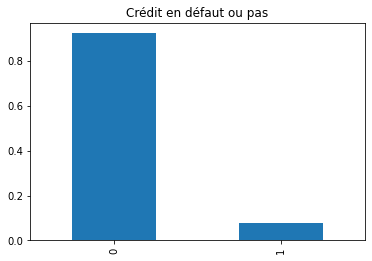

In [13]:
# 'TARGET' = variable dépendante:

print(application_train['TARGET'].value_counts())
p_100 = application_train['TARGET'].value_counts(normalize=True)*100    # "normalize=True" pour avoir des %
print("\n", p_100)
application_train['TARGET'].value_counts(normalize=True).plot.bar(title="Crédit en défaut ou pas")

# Il y a un fort deséquilibre. En tenir compte pour la mise au point du modèle prédictif


In [14]:
# Analyse des variables numériques
application_train[col_num].describe().round(2)

# affichage de valeurs statistiques
# 50% : médiane

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count    82179.00  82179.00      82179.00      8.217900e+04    82179.00   
mean    278049.87      0.08          0.57      1.829646e+05   625502.63   
std     103053.17      0.26          0.79      4.215635e+05   416625.45   
min     100002.00      0.00          0.00      2.700000e+04    45000.00   
25%     188681.00      0.00          0.00      1.125000e+05   284400.00   
50%     278007.00      0.00          0.00      1.575000e+05   531000.00   
75%     367958.50      0.00          1.00      2.250000e+05   841500.00   
max     456255.00      1.00         19.00      1.170000e+08  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count     82179.00         82179.00                    82179.00    82179.00   
mean      28369.48        563474.22                        0.02       38.25   
std       14826.07        383288.00                        0.01        9.15   
min        2317.50         45000.00                        0.00       21.00   
25%       17509.50        252000.00                        0.01       31.00   
50%       26217.00        454500.00                        0.02       37.00   
75%       36292.50        720000.00                        0.03       45.00   
max      258025.50       4050000.00                        0.07       68.00   

       DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count       82179.00         82179.00              82179.00   
mean        -2313.90             2.33                  2.06   
std          2198.76             0.97                  0.51   
min        -16767.00             1.00                  1.00   
25%         -3107.00             2.00                  2.00   
50%         -1645.00             2.00                  2.00   
75%          -777.00             3.00                  2.00   
max            -3.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
count                     82179.00      82179.00      82179.00      82179.00   
mean                          2.04          0.49          0.53          0.49   
std                           0.51          0.21          0.18          0.19   
min                           1.00          0.01          0.00          0.00   
25%                           2.00          0.32          0.43          0.35   
50%                           2.00          0.49          0.58          0.51   
75%                           2.00          0.65          0.67          0.65   
max                           3.00          0.94          0.85          0.89   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count                  82179.00                  82179.00   
mean                       1.44                      0.14   
std                        2.59                      0.45   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        2.00                      0.00   
max                      348.00                     34.00   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count                  82179.00                  82179.00   
mean                       1.43                      0.10   
std                        2.57                      0.36   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        2.00                      0.00   
max                      344.00                     24.00   

       DAYS_LAST_PHONE_CHANGE  NB_DOCUMENT  
count                82179.00     82179.00  
mean                 -1060.17         0.76  
std                    835.43         0.42  
min                  -4185.00         0.00  
25%  

### Analyse bivariée

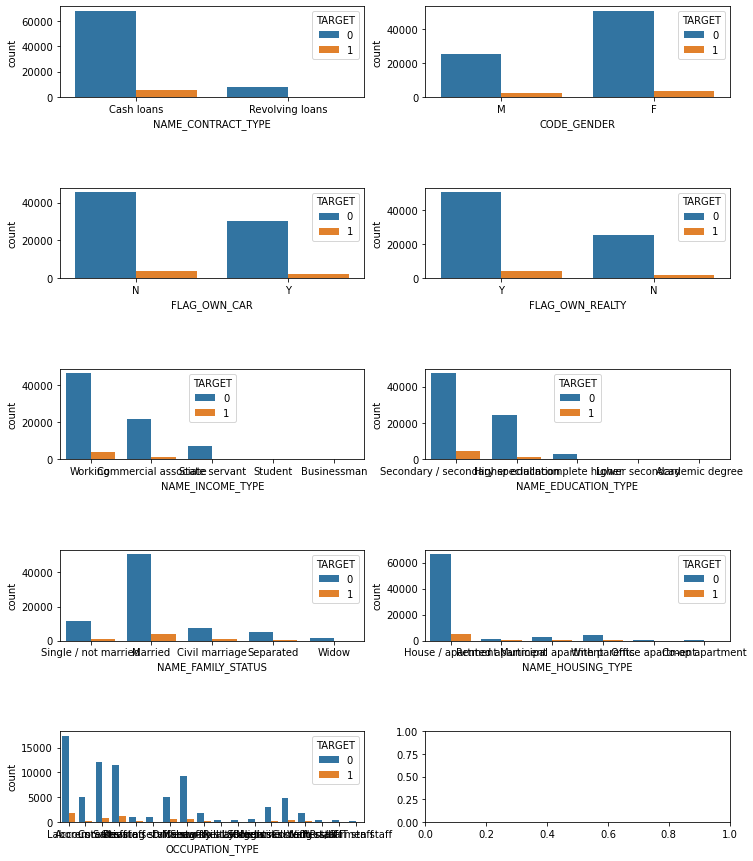

In [15]:
# Entre Les variables catégorielles et la variable cible 'TARGET' :

fig,axes=plt.subplots(5,2,figsize=(12,15))   # 4 lignes, 2 colonnes
for idx,col_cat in enumerate(col_obj):
    row,col= idx//2,idx%2
    sns.countplot(x=col_cat, data=application_train, hue='TARGET', ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Difficile de dire visuellement quelle variable influe sur la target
# A refaire une fois l'équilibrage du dataset fait


<AxesSubplot:>

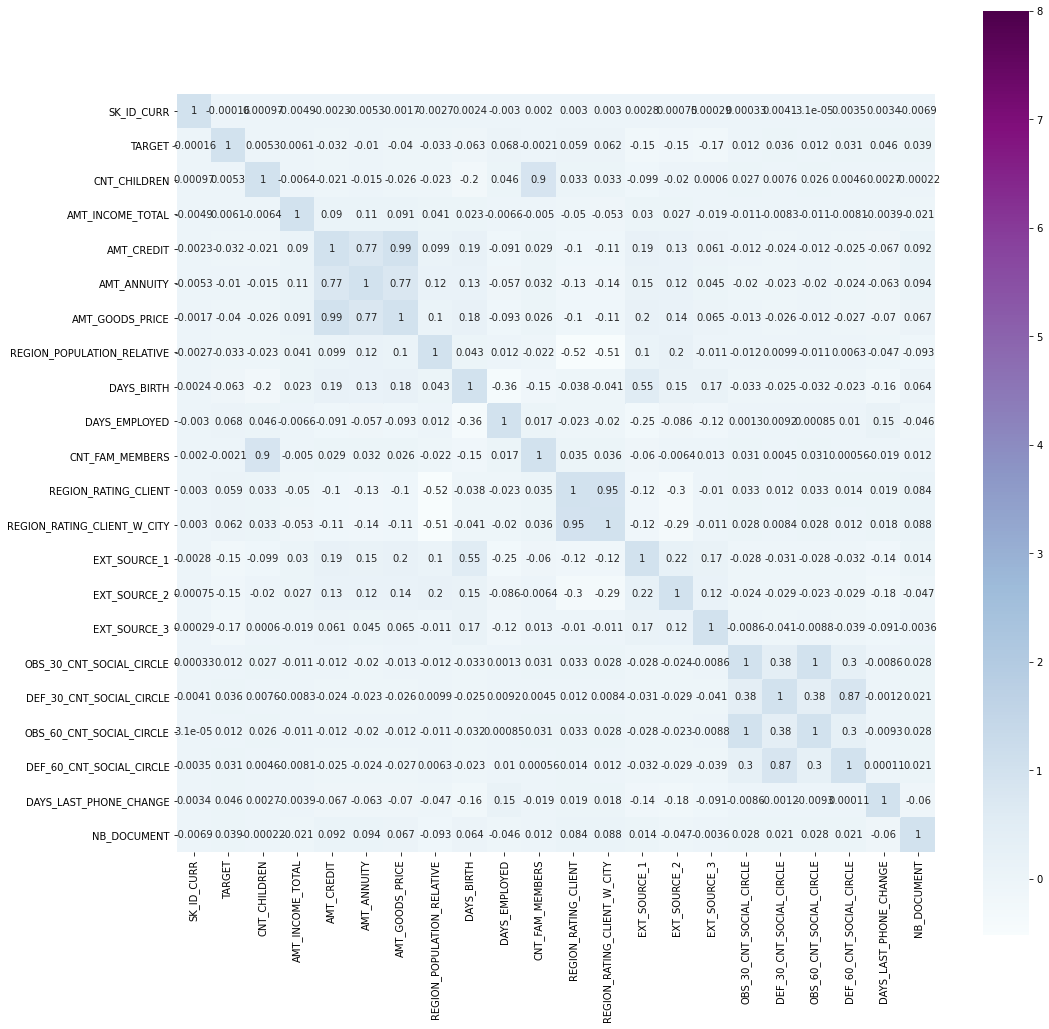

In [16]:
# Corrélations des variables numériques : Matrice de corrélation heatmap 
matrix=application_train.corr()
fig,axes=plt.subplots(figsize=(17,17)) 
sns.heatmap(matrix, vmax=8, square=True, cmap='BuPu', annot=True)# visualisation de la matrice de corrélation


In [17]:
# matrice de corrélation
application_train.corr()

# Matrice des corrélations qui donne les coefs de corrélations linéaires,
#  sous entend que si il y a corrélation, elle est de type linéaire.
# Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles.


SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.000156      0.000967   
TARGET                        -0.000156  1.000000      0.005296   
CNT_CHILDREN                   0.000967  0.005296      1.000000   
AMT_INCOME_TOTAL              -0.004890  0.006102     -0.006436   
AMT_CREDIT                    -0.002327 -0.032170     -0.020798   
AMT_ANNUITY                   -0.005332 -0.010151     -0.015293   
AMT_GOODS_PRICE               -0.001660 -0.040463     -0.026409   
REGION_POPULATION_RELATIVE    -0.002672 -0.033098     -0.023122   
DAYS_BIRTH                     0.002371 -0.062774     -0.198306   
DAYS_EMPLOYED                 -0.002977  0.067751      0.046119   
CNT_FAM_MEMBERS                0.001993 -0.002105      0.901832   
REGION_RATING_CLIENT           0.002961  0.058963      0.033059   
REGION_RATING_CLIENT_W_CITY    0.002991  0.062002      0.032736   
EXT_SOURCE_1                   0.002753 -0.153896     -0.099001   
EXT_SOURCE_2                   0.000751 -0.149422     -0.019520   
EXT_SOURCE_3                   0.000290 -0.174573      0.000604   
OBS_30_CNT_SOCIAL_CIRCLE       0.000325  0.011815      0.026574   
DEF_30_CNT_SOCIAL_CIRCLE       0.004086  0.035887      0.007649   
OBS_60_CNT_SOCIAL_CIRCLE       0.000031  0.011830      0.026040   
DEF_60_CNT_SOCIAL_CIRCLE       0.003491  0.031024      0.004634   
DAYS_LAST_PHONE_CHANGE         0.003380  0.045951      0.002694   
NB_DOCUMENT                   -0.006907  0.039225     -0.000224   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          -0.004890   -0.002327    -0.005332   
TARGET                               0.006102   -0.032170    -0.010151   
CNT_CHILDREN                        -0.006436   -0.020798    -0.015293   
AMT_INCOME_TOTAL                     1.000000    0.089733     0.108795   
AMT_CREDIT                           0.089733    1.000000     0.768713   
AMT_ANNUITY                          0.108795    0.768713     1.000000   
AMT_GOODS_PRICE                      0.090614    0.987099     0.771147   
REGION_POPULATION_RELATIVE           0.041076    0.098635     0.116298   
DAYS_BIRTH                           0.023003    0.185432     0.131463   
DAYS_EMPLOYED                       -0.006634   -0.091081    -0.057413   
CNT_FAM_MEMBERS                     -0.005000    0.029397     0.031882   
REGION_RATING_CLIENT                -0.050110   -0.103245    -0.127790   
REGION_RATING_CLIENT_W_CITY         -0.053350   -0.111393    -0.140586   
EXT_SOURCE_1                         0.029669    0.189954     0.148623   
EXT_SOURCE_2                         0.027117    0.128436     0.115244   
EXT_SOURCE_3                        -0.018989    0.060566     0.045118   
OBS_30_CNT_SOCIAL_CIRCLE            -0.010915   -0.011987    -0.020236   
DEF_30_CNT_SOCIAL_CIRCLE            -0.008257   -0.024091    -0.023416   
OBS_60_CNT_SOCIAL_CIRCLE            -0.010889   -0.011691    -0.019860   
DEF_60_CNT_SOCIAL_CIRCLE            -0.008102   -0.025397    -0.024245   
DAYS_LAST_PHONE_CHANGE              -0.003942   -0.067000    -0.063226   
NB_DOCUMENT                         -0.021156    0.091832     0.094251   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         -0.001660                   -0.002672   
TARGET                             -0.040463                   -0.033098   
CNT_CHILDREN                       -0.026409                   -0.023122   
AMT_INCOME_TOTAL                    0.090614                    0.041076   
AMT_CREDIT                          0.987099                    0.098635   
AMT_ANNUITY                         0.771147                    0.116298   
AMT_GOODS_PRICE                     1.000000                    0.100054   
REGION_POPULATION_RELATIVE          0.100054                    1.000000   
DAYS_BIRTH                          0.182343                    0.042736   
DAYS_EMPLOYED           

In [18]:
p_100 = application_train['FLAG_OWN_CAR'].value_counts(normalize=True)    # "normalize=True" pour avoir des %
print(p_100, "\n")

p_100 = application_train['FLAG_OWN_REALTY'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['CODE_GENDER'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_INCOME_TYPE'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_FAMILY_STATUS'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_HOUSING_TYPE'].value_counts(normalize=True)
print(p_100, "\n")


N    0.604108
Y    0.395892
Name: FLAG_OWN_CAR, dtype: float64 

Y    0.66315
N    0.33685
Name: FLAG_OWN_REALTY, dtype: float64 

F    0.661495
M    0.338505
Name: CODE_GENDER, dtype: float64 

Working                 0.617311
Commercial associate    0.287458
State servant           0.095134
Student                 0.000073
Businessman             0.000024
Name: NAME_INCOME_TYPE, dtype: float64 

Married                 0.662359
Single / not married    0.151876
Civil marriage          0.098955
Separated               0.066173
Widow                   0.020638
Name: NAME_FAMILY_STATUS, dtype: float64 

Secondary / secondary special    0.633203
Higher education                 0.315811
Incomplete higher                0.043417
Lower secondary                  0.006912
Academic degree                  0.000657
Name: NAME_EDUCATION_TYPE, dtype: float64 

House / apartment      0.870721
With parents           0.062534
Municipal apartment    0.032819
Rented apartment       0.019287
Office ap

In [19]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT'],
      dtype='object')

## application_test

In [20]:
# sans TARGET

print("Shape = ", application_test.shape)
application_test.head(5)


Shape =  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [21]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(application_test.isna().sum()/application_test.shape[0]).sort_values(ascending=False)*100


COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
COMMONAREA_MEDI                 68.716150
NONLIVINGAPARTMENTS_AVG         68.412523
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MODE           67.249302
LIVINGAPARTMENTS_MEDI           67.249302
FLOORSMIN_MEDI                  66.605121
FLOORSMIN_AVG                   66.605121
FLOORSMIN_MODE                  66.605121
OWN_CAR_AGE                     66.289184
YEARS_BUILD_AVG                 65.275726
YEARS_BUILD_MEDI                65.275726
YEARS_BUILD_MODE                65.275726
LANDAREA_MEDI                   57.964057
LANDAREA_AVG                    57.964057
LANDAREA_MODE                   57.964057
BASEMENTAREA_MEDI               56.706466
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
NONLIVINGAREA_AVG               53

In [22]:
# Application des mêmes traitements que pour application_train :

# 1. Suppression des colonnes apriori sans intérêt :
application_test = application_test.drop(col_to_drop, 1)


# 2. Suppression des colonnes de type *_MEDI , *_AVG , *_MODE
cols = [c for c in application_test.columns if c[-5:] != '_MEDI'  if c[-5:] != '_MODE'  if c[-4:] != '_AVG']
application_test = application_test[cols]


# 3. Remplacement de la somme des 'FLAG_DOCUMENT_X' par 'NB_DOCUMENT'
application_test['NB_DOCUMENT'] = application_test['FLAG_DOCUMENT_2'] + application_test['FLAG_DOCUMENT_3']
+ application_test['FLAG_DOCUMENT_4'] + application_test['FLAG_DOCUMENT_5'] + application_test['FLAG_DOCUMENT_6']
+ application_test['FLAG_DOCUMENT_7'] + application_test['FLAG_DOCUMENT_8'] + application_test['FLAG_DOCUMENT_9']
+ application_test['FLAG_DOCUMENT_10'] + application_test['FLAG_DOCUMENT_11'] + application_test['FLAG_DOCUMENT_12']
+ application_test['FLAG_DOCUMENT_13'] + application_test['FLAG_DOCUMENT_14'] + application_test['FLAG_DOCUMENT_15']
+ application_test['FLAG_DOCUMENT_16'] + application_test['FLAG_DOCUMENT_17'] + application_test['FLAG_DOCUMENT_18']
+ application_test['FLAG_DOCUMENT_19'] + application_test['FLAG_DOCUMENT_20'] + application_test['FLAG_DOCUMENT_21']

application_test = application_test.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], 1)

application_test['DAYS_BIRTH'] = np.abs(application_test['DAYS_BIRTH'])   # pour avoir des valeurs positives ...
application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH']/365       # ... convertit en années
application_test = application_test.astype({"DAYS_BIRTH": int})           # ... convertit en entier


In [25]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(application_test.isna().sum()/application_test.shape[0]).sort_values(ascending=False)*100

EXT_SOURCE_1                   42.122107
OCCUPATION_TYPE                32.014197
EXT_SOURCE_3                   17.782701
DEF_60_CNT_SOCIAL_CIRCLE        0.059495
OBS_60_CNT_SOCIAL_CIRCLE        0.059495
DEF_30_CNT_SOCIAL_CIRCLE        0.059495
OBS_30_CNT_SOCIAL_CIRCLE        0.059495
AMT_ANNUITY                     0.049237
EXT_SOURCE_2                    0.016412
SK_ID_CURR                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
CNT_FAM_MEMBERS                 0.000000
DAYS_BIRTH                      0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_GOODS_PRICE                 0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL

In [23]:
# Apercu du contenu des variables catégorielles de type Object (texte) :

for col in application_test.select_dtypes('object'):
    print(f'{col :_<40} {application_test[col].unique()}')

# Il n'y a pas de ligne avec une valeur indéfinie, par contre il y a des NaN
    

NAME_CONTRACT_TYPE______________________ ['Cash loans' 'Revolving loans']
CODE_GENDER_____________________________ ['F' 'M']
FLAG_OWN_CAR____________________________ ['N' 'Y']
FLAG_OWN_REALTY_________________________ ['Y' 'N']
NAME_INCOME_TYPE________________________ ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
NAME_EDUCATION_TYPE_____________________ ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS______________________ ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE_______________________ ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE_________________________ [nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private s

In [24]:
# Apercu du contenu des variables NON catégorielles :

for col in application_test.select_dtypes(exclude=['object']):
    print(f'{col :_<40} {application_test[col].unique()}')

#  il y a aussi des NaN chez certaines variables numériques


SK_ID_CURR______________________________ [100001 100005 100013 ... 456223 456224 456250]
CNT_CHILDREN____________________________ [ 0  2  1  3  8  4  6  5  7 20 11]
AMT_INCOME_TOTAL________________________ [ 135000.     99000.    202500.    315000.    180000.    270000.
  166500.    162000.     67500.    247500.     90000.    225000.
  175500.    157500.    337500.     76500.    112500.    360000.
  102150.    171000.    121500.    405000.    211500.    229500.
  144000.     40500.     92250.    279000.     87750.    126000.
   45000.    252000.    495000.    189000.    333000.     81000.
  193500.     63000.     94500.    292500.    198000.    216000.
  540000.    450000.    103500.    206100.    153747.    117000.
   58500.    234000.    675000.    261000.     72000.    382500.
  148500.    301500.     54000.     56700.    108000.    288000.
   85500.    153000.    387000.     57150.    207000.    254700.
   36000.     47250.    187398.    130500.    306000.    139500.
   74250.    6

In [25]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("application_test :", application_test.shape)   # (48744, 30)
application_test.dropna(how = 'any', inplace = True)
print("application_test :", application_test.shape)   #(17461, 30)


application_test : (48744, 30)
application_test : (17461, 30)


## bureau_balance

In [26]:
print(bureau_balance.shape)
bureau_balance.sort_values(['SK_ID_BUREAU','MONTHS_BALANCE'], ascending = False).head(10)

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
23544003       6842888               0      C
23544004       6842888              -1      C
23544005       6842888              -2      C
23544006       6842888              -3      C
23544007       6842888              -4      C
23544008       6842888              -5      C
23544009       6842888              -6      C
23544010       6842888              -7      C
23544011       6842888              -8      C
23544012       6842888              -9      C

In [27]:
bureau_balance['STATUS'].unique()           # ['C', '0', 'X', '1', '2', '3', '5', '4']
#  … [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 
#                                             2 means DPD 31-60,  … 5 means DPD 120+ or sold or written off ])
#
# bureau_balance['MONTHS_BALANCE'].unique()   # [ 0,  -1,  ....  -96]     (-1 -> le mois le plus récent)

# Ajout d'une variable qui fait la moyenne des STATUS (0,1,2,3,4,5) en excluant ('C','X')
#
#   'X' : 'status unknown' ne nous apporte pas d'info
#   'C' : 'closed' ne nous apporte pas d'info non plus.
#                                                                    
#    Plus cette variable se rapproche de 5 plus il y a eu de jours de retard au cours du crédit


print("bureau_balance.shape:", bureau_balance.shape)
bb2 = bureau_balance[~bureau_balance['STATUS'].isin(['C','X'])]   # rejette les lignes avec le status 'C' ou 'X'
print("bb2.shape:", bb2.shape)

bb2 = bb2.astype({"STATUS": int})                                 # nécessaire pour faire après la moyenne sur cette colonne
bb2['STATUS'].unique()


bureau_balance.shape: (27299925, 3)
bb2.shape: (7842450, 3)


array([0, 1, 2, 3, 5, 4])

In [28]:
#  Moyenne des 'STATUS' par 'SK_ID_BUREAU'

bb2 = bb2.groupby(['SK_ID_BUREAU']).agg(
    {'SK_ID_BUREAU': 'first',
     'STATUS': 'mean' })

# bb2.columns = bb2.columns.droplevel(level=[0])

bb2.columns = ['SK_ID_BUREAU', 'BB_STATUS']
print("bb2.shape:", bb2.shape)

bb2.reset_index(drop = True, inplace = True)
bb2.sort_values(['SK_ID_BUREAU'], ascending = False).head(6)


bb2.shape: (687027, 2)


SK_ID_BUREAU  BB_STATUS
687026       6842888        0.1
687025       6842887        0.0
687024       6842886        0.0
687023       6842885        2.5
687022       6842884        0.0
687021       6842883        0.0

## bureau

In [29]:
# bureau['CREDIT_TYPE'].unique()
# ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan', 'Loan for working capital replenishment',
#  'Loan for business development', 'Real estate loan', 'Unknown type of loan', 'Another type of loan',
#  'Cash loan (non-earmarked)', 'Loan for the purchase of equipment', 'Mobile operator loan', 'Interbank credit',
#  'Loan for purchase of shares (margin lending)']   

bureau.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(15)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1010013      456255       5126337        Closed      currency 1        -2337   
1010012      456255       5126336        Closed      currency 1        -2337   
1010011      456255       5126335        Closed      currency 1        -1512   
1010010      456255       5126334        Active      currency 1         -451   
1010009      456255       5126333        Active      currency 1         -363   
1010008      456255       5126332        Active      currency 1         -378   
1010007      456255       5126331        Active      currency 1        -1020   
1010006      456255       5126330        Closed      currency 1        -1021   
1010005      456255       5126329        Active      currency 1         -573   
1010004      456255       5126328        Closed      currency 1         -970   
1010003      456255       5126327        Closed      currency 1        -1022   
1578578      456254       6669849        Closed      currency 1        -1104   
639151       456253       6230038        Active      currency 1         -713   
312587       456253       6098499        Closed      currency 1         -919   
312586       456253       6098498        Closed      currency 1         -919   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1010013                   0              -1243.0            -1621.0   
1010012                   0               8620.0             -779.0   
1010011                   0                315.0             -781.0   
1010010                   0                279.0                NaN   
1010009                   0               1463.0                NaN   
1010008                   0              27320.0                NaN   
1010007                   0                806.0                NaN   
1010006                   0               -959.0             -959.0   
1010005                   0                523.0                NaN   
1010004                   0               -621.0             -712.0   
1010003                   0               -959.0             -958.0   
1578578                   0               -859.0             -859.0   
639151                    0               1113.0                NaN   
312587                    0               -189.0             -794.0   
312586                    0               -189.0             -794.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1010013               16618.500                   0        450000.0   
1010012                2646.000                   1         38925.0   
1010011               25578.000                   0        900000.0   
1010010               15439.905                   0        450000.0   
1010009                   0.000                   0        436032.0   
1010008                     NaN                   0         90000.0   
1010007                     NaN                   0        810000.0   
1010006                     NaN                   0         22995.0   
1010005                     NaN                   0        553500.0   
1010004                     NaN                   0         27472.5   
1010003                     NaN                   0         22995.0   
1578578                     NaN                   0         45000.0   
639151                      NaN                   0       2250000.0   
312587                      NaN                   0        675000.0   
312586                      NaN                   0        675000.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1010013                  NaN                   NaN                     0.0   
1010012                  NaN                   NaN                     0.0   
1010011                  NaN                   NaN                     0.0   
1010010            191005.47                   0.0                     0.0   
1010009            363573.54                   0.0              

In [30]:
#print("Doublons sur SK_ID_CURR      =", len(bureau[bureau.duplicated(subset = ['SK_ID_CURR'])]))
print(len(bureau), "prêts du Bureau répartis sur", len(bureau['SK_ID_CURR'].unique()), "SK_ID_CURR uniques")


1716428 prêts du Bureau répartis sur 305811 SK_ID_CURR uniques


In [31]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(bureau.isna().sum()/bureau.shape[0]).sort_values(ascending=False)*100


AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVERDUE    65.513264
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_DEBT       15.011932
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM             0.000757
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
SK_ID_BUREAU               0.000000
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
SK_ID_CURR                 0.000000
dtype: float64

In [32]:
# Colonnes à supprimer :

bureau = bureau.drop(['CREDIT_CURRENCY', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 
                      'AMT_CREDIT_SUM_LIMIT', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'CREDIT_ACTIVE'], 1) 

bureau.columns = ['SK_ID_CURR', 'SK_ID_BUREAU', 'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE',
                  'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 
                  'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY']

bureau['B_DAYS_CREDIT'] = np.abs(bureau['B_DAYS_CREDIT'])   # pour avoir des valeurs positives

bureau.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(10)

SK_ID_CURR  SK_ID_BUREAU  B_DAYS_CREDIT  B_CREDIT_DAY_OVERDUE  \
1010013      456255       5126337           2337                     0   
1010012      456255       5126336           2337                     0   
1010011      456255       5126335           1512                     0   
1010010      456255       5126334            451                     0   
1010009      456255       5126333            363                     0   
1010008      456255       5126332            378                     0   
1010007      456255       5126331           1020                     0   
1010006      456255       5126330           1021                     0   
1010005      456255       5126329            573                     0   
1010004      456255       5126328            970                     0   

         B_AMT_CREDIT_MAX_OVERDUE  B_CNT_CREDIT_PROLONG  B_AMT_CREDIT_SUM  \
1010013                 16618.500                     0          450000.0   
1010012                  2646.000                     1           38925.0   
1010011                 25578.000                     0          900000.0   
1010010                 15439.905                     0          450000.0   
1010009                     0.000                     0          436032.0   
1010008                       NaN                     0           90000.0   
1010007                       NaN                     0          810000.0   
1010006                       NaN                     0           22995.0   
1010005                       NaN                     0          553500.0   
1010004                       NaN                     0           27472.5   

         B_AMT_CREDIT_SUM_DEBT  B_AMT_CREDIT_SUM_OVERDUE  B_AMT_ANNUITY  
1010013                    NaN                       0.0            0.0  
1010012                    NaN                       0.0         3244.5  
1010011                    NaN                       0.0            0.0  
1010010              191005.47                       0.0         3244.5  
1010009              363573.54                       0.0            0.0  
1010008               61060.50                       0.0            NaN  
1010007              595102.50                       0.0            0.0  
1010006                   0.00                       0.0         3244.5  
1010005              324171.00                       0.0            0.0  
1010004                   0.00                       0.0            NaN

In [33]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("bureau :", bureau.shape)   # (1.716.428, 10)
bureau.dropna(how = 'any', inplace = True)
print("bureau :", bureau.shape)   # (   98.934, 10)


bureau : (1716428, 10)
bureau : (98934, 10)


In [34]:
#  Merge des tables  'bureau' & 'bb2'  
#
#  ... permet d'ajouter la colonne 'BB_STATUS' avant d'aggréger le 'bureau' sur la colonne 'SK_ID_CURR'

print("bb2.shape:", bb2.shape)
print("bureau.shape:", bureau.shape)
loans = pd.merge(bureau, bb2, on='SK_ID_BUREAU')   # bb2 est le nouveau bureau_balance aggrégé sur la colonne 'SK_ID_BUREAU'
print("loans.shape:", loans.shape)
print("Nb SK_ID_CURR uniques=", len(loans['SK_ID_CURR'].unique()), "\n")
loans.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(20)

# Sur les 687027 'SK_ID_BUREAU' de bb2, 663424 sont référencés dans 'bureau'

bb2.shape: (687027, 2)
bureau.shape: (98934, 10)
loans.shape: (94543, 11)
Nb SK_ID_CURR uniques= 54783 



SK_ID_CURR  SK_ID_BUREAU  B_DAYS_CREDIT  B_CREDIT_DAY_OVERDUE  \
58567      456255       5126334            451                     0   
58566      456255       5126333            363                     0   
73090      456250       6817238            824                     0   
73089      456250       6817237            760                     0   
72656      456247       6618243            776                     0   
729        456247       6022153            309                     0   
92076      456244       6643949            400                     0   
86618      456244       6643945           1497                     0   
92075      456244       6643944           1719                     0   
92074      456244       6643923           2906                     0   
78956      456238       6731222           2665                     0   
77224      456238       6731221            593                     0   
21108      456234       5087540            438                     0   
21107      456234       5087532           1118                     0   
94460      456234       5087531           1118                     0   
89962      456233       5633934            203                     0   
85378      456230       5999938            606                     0   
64550      456224       6436443           1097                     0   
64549      456224       6436442           1358                     0   
60477      456223       6433065            229                     0   

       B_AMT_CREDIT_MAX_OVERDUE  B_CNT_CREDIT_PROLONG  B_AMT_CREDIT_SUM  \
58567                 15439.905                     0        450000.000   
58566                     0.000                     0        436032.000   
73090                     0.000                     0        450000.000   
73089                     0.000                     0       2153110.050   
72656                     0.000                     0        169159.500   
729                   22027.500                     0        900000.000   
92076                     0.000                     0             0.000   
86618                     0.000                     0        121095.495   
92075                 12038.670                     0        315000.000   
92074                 10787.445                     0        225000.000   
78956                     0.000                     0         20245.500   
77224                     0.000                     0        693000.000   
21108                  4994.235                     0         22326.300   
21107                     0.000                     0             0.000   
94460                  7605.000                     0         64779.300   
89962                     0.000                     0        282663.315   
85378                     0.000                     0        157500.000   
64550                     0.000                     0        991189.080   
64549                     0.000                     0             0.000   
60477                     0.000                     0         50547.960   

       B_AMT_CREDIT_SUM_DEBT  B_AMT_CREDIT_SUM_OVERDUE  B_AMT_ANNUITY  \
58567             191005.470                       0.0       3244.500   
58566             363573.540                       0.0          0.000   
73090             391731.615                       0.0      27757.395   
73089            1840308.480                       0.0      51799.500   
72656                  0.000                       0.0       4329.000   
729                    0.000                       0.0       4329.000   
92076                  0.000                       0.0          0.000   
86618                  0.000                       0.0          0.000   
92075                  0.000                       0.0          0.000   
92074               -534.645                       0.0      47457.000   
78956                  0.000                       0.0      19800.000   
77224             445360.500              

In [35]:
#  Aggrégation des anciens prêts du bureau sur la colonne 'SK_ID_CURR'

print("loans.shape:", loans.shape)

bureau2 = loans.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'B_DAYS_CREDIT': 'min',
     'B_CREDIT_DAY_OVERDUE': ['mean'],
     'B_AMT_CREDIT_MAX_OVERDUE': ['mean'],
     'B_CNT_CREDIT_PROLONG': ['sum'],
     'B_AMT_CREDIT_SUM': ['mean'],
     'B_AMT_CREDIT_SUM_DEBT': ['mean'],
     'B_AMT_CREDIT_SUM_OVERDUE': ['mean'],
     'B_AMT_ANNUITY': 'mean',
     'BB_STATUS': ['min','max']})

print("bureau2.shape:", bureau2.shape)

bureau2.columns = bureau2.columns.droplevel(level=[0])

bureau2.columns = ['SK_ID_CURR', 
                   'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG',
                   'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY',
                   'BB_MIN_STATUS', 'BB_MAX_STATUS']

bureau2.reset_index(drop = True, inplace = True)
bureau2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


loans.shape: (94543, 11)
bureau2.shape: (54783, 11)


SK_ID_CURR  B_DAYS_CREDIT  B_CREDIT_DAY_OVERDUE  \
54782      456255            363                   0.0   
54781      456250            760                   0.0   
54780      456247            309                   0.0   
54779      456244            400                   0.0   
54778      456238            593                   0.0   
54777      456234            438                   0.0   
54776      456233            203                   0.0   
54775      456230            606                   0.0   
54774      456224           1097                   0.0   
54773      456223            229                   0.0   

       B_AMT_CREDIT_MAX_OVERDUE  B_CNT_CREDIT_PROLONG  B_AMT_CREDIT_SUM  \
54782                7719.95250                     0      4.430160e+05   
54781                   0.00000                     0      1.301555e+06   
54780               11013.75000                     0      5.345798e+05   
54779                5706.52875                     0      1.652739e+05   
54778                   0.00000                     0      3.566228e+05   
54777                4199.74500                     0      2.903520e+04   
54776                   0.00000                     0      2.826633e+05   
54775                   0.00000                     0      1.575000e+05   
54774                   0.00000                     0      4.955945e+05   
54773                   0.00000                     0      5.054796e+04   

       B_AMT_CREDIT_SUM_DEBT  B_AMT_CREDIT_SUM_OVERDUE  B_AMT_ANNUITY  \
54782           2.772895e+05                       0.0      1622.2500   
54781           1.116020e+06                       0.0     39778.4475   
54780           0.000000e+00                       0.0      4329.0000   
54779          -1.336612e+02                       0.0     11864.2500   
54778           2.226802e+05                       0.0      9900.0000   
54777          -1.285950e+02                       0.0     13125.0150   
54776           2.239439e+05                       0.0      7537.5000   
54775           6.754950e+04                       0.0     15750.0000   
54774           2.543625e+04                       0.0     13765.5000   
54773           2.134350e+04                       0.0      5053.5000   

       BB_MIN_STATUS  BB_MAX_STATUS  
54782            0.0       0.000000  
54781            0.0       0.000000  
54780            0.0       0.000000  
54779            0.0       0.583333  
54778            0.0       0.000000  
54777            0.5       0.500000  
54776            0.0       0.000000  
54775            0.0       0.000000  
54774            0.0       0.000000  
54773            0.0       0.000000

## credit_card_balance

In [36]:
print(credit_card_balance.shape)
credit_card_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(20)


(3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
140639      1794451      456250              -1   153832.725   
1049726     1794451      456250              -2   158266.935   
1154348     1794451      456250              -3   162425.565   
310299      1794451      456250              -4   166188.150   
1437743     1794451      456250              -5   169443.855   
431924      1794451      456250              -6   171943.020   
2248506     1794451      456250              -7   174435.885   
2985617     1794451      456250              -8   177219.000   
3734047     1794451      456250              -9   180536.760   
1684283     1794451      456250             -10   186577.605   
3611324     1794451      456250             -11   200208.915   
3000394     1794451      456250             -12   181993.500   
735902      2743495      456248              -2        0.000   
1155972     2743495      456248              -3        0.000   
1273254     2743495      456248              -4        0.000   
1345065     2743495      456248              -5        0.000   
789285      2743495      456248              -6        0.000   
2975089     2743495      456248              -7        0.000   
943502      2743495      456248              -8        0.000   
2575472     2743495      456248              -9        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
140639                    175500                       0.0   
1049726                   175500                       0.0   
1154348                   175500                       0.0   
310299                    180000                       0.0   
1437743                   180000                       0.0   
431924                    180000                       0.0   
2248506                   180000                       0.0   
2985617                   180000                       0.0   
3734047                   180000                       0.0   
1684283                   180000                       0.0   
3611324                   180000                    9000.0   
3000394                   180000                  171000.0   
735902                    900000                       NaN   
1155972                   900000                       NaN   
1273254                   900000                       NaN   
1345065                   900000                       NaN   
789285                    900000                       NaN   
2975089                   900000                       NaN   
943502                    900000                       NaN   
2575472                   900000                       NaN   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
140639                    0.0                         0.0   
1049726                   0.0                         0.0   
1154348                   0.0                         0.0   
310299                    0.0                         0.0   
1437743                   0.0                         0.0   
431924                    0.0                         0.0   
2248506                   0.0                         0.0   
2985617                   0.0                         0.0   
3734047                   0.0                         0.0   
1684283                   0.0                         0.0   
3611324                9000.0                         0.0   
3000394              171000.0                         0.0   
735902                    0.0                         NaN   
1155972                   0.0                         NaN   
1273254                   0.0                         NaN   
1345065                   0.0                         NaN   
789285                    0.0                         NaN   
2975089                   0.0                         NaN   
943502                    0.0                         NaN   
2575472                   0.0                         NaN   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
140639           

In [37]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes)
(credit_card_balance.isna().sum()/credit_card_balance.shape[0]).sort_values(ascending=False)*100


AMT_PAYMENT_CURRENT           19.998063
AMT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
AMT_INST_MIN_REGULARITY        7.948208
SK_ID_PREV                     0.000000
AMT_TOTAL_RECEIVABLE           0.000000
SK_DPD                         0.000000
NAME_CONTRACT_STATUS           0.000000
CNT_DRAWINGS_CURRENT           0.000000
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECIVABLE                  0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
SK_ID_CURR                     0.000000
AMT_DRAWINGS_CURRENT           0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_BALANCE                    0.000000
MONTHS_BALANCE                 0.000000
SK_DPD_DEF                     0.000000
dtype: float64

In [38]:
# 1. Suppression des colonnes apriori sans intérêt :

credit_card_balance = credit_card_balance.drop(['AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'NAME_CONTRACT_STATUS', 'SK_DPD_DEF',
       'CNT_INSTALMENT_MATURE_CUM'], 1)


# CNT_INSTALMENT_MATURE_CUM :  nombre de remboursements cumulés sur le précédent crédit
# SK_DPD                    :  nb jours en retard durant le mois du précédent crédit

In [39]:
credit_card_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(1000)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  SK_DPD
140639      1794451      456250              -1       0
1049726     1794451      456250              -2       0
1154348     1794451      456250              -3       0
310299      1794451      456250              -4       0
1437743     1794451      456250              -5       0
431924      1794451      456250              -6       0
2248506     1794451      456250              -7       0
2985617     1794451      456250              -8       0
3734047     1794451      456250              -9       0
1684283     1794451      456250             -10       0
3611324     1794451      456250             -11       0
3000394     1794451      456250             -12       0
735902      2743495      456248              -2       0
1155972     2743495      456248              -3       0
1273254     2743495      456248              -4       0
1345065     2743495      456248              -5       0
789285      2743495      456248              -6       0
2975089     2743495      456248              -7       0
943502      2743495      456248              -8       0
2575472     2743495      456248              -9       0
3177685     2743495      456248             -10       0
1406469     2743495      456248             -11       0
3286792     2743495      456248             -12       0
903311      2743495      456248             -13       0
2423678     2743495      456248             -14       0
3740421     2743495      456248             -15       0
548271      2743495      456248             -16       0
552210      2743495      456248             -17       0
857081      2743495      456248             -18       0
208806      2743495      456248             -19       0
1331891     2743495      456248             -20       0
569755      2743495      456248             -21       0
1046758     2743495      456248             -22       0
240997      2743495      456248             -23       0
62806       2743495      456248             -24       0
1148019     1595171      456247              -2       0
1692394     1595171      456247              -3       0
1346532     1595171      456247              -4       0
1483136     1595171      456247              -5       0
2148517     1595171      456247              -6       0
2188642     1595171      456247              -7       0
1091740     1595171      456247              -8       0
907769      1595171      456247              -9       0
1375383     1595171      456247             -10       0
1266567     1595171      456247             -11       0
1706269     1595171      456247             -12       0
1624584     1595171      456247             -13       0
2423915     1595171      456247             -14       0
12169       1595171      456247             -15       0
1854067     1595171      456247             -16       0
166883      1595171      456247             -17       0
3803908     1595171      456247             -18       0
682942      1595171      456247             -19       0
3549699     1595171      456247             -20       0
373538      1595171      456247             -21       0
3151744     1595171      456247             -22       0
3597769     1595171      456247             -23       0
755756      1595171      456247             -24       0
3254826     1595171      456247             -25       0
1470998     1595171      456247             -26       0
3314566     1595171      456247             -27       0
3234413     1595171      456247             -28       0
2991969     1595171      456247             -29       0
2325427     1595171      456247             -30       0
1563126     1595171      456247             -31       0
1658055     1595171      456247             -32       0
2493845     1595171      456247             -33       0
147621      1595171      456247             -34       0
481389      1595171      456247             -35       0
387878      1595171      456247             -36       0
3375989     1595171      456247  

In [40]:
#  Somme des 'CNT_INSTALMENT_MATURE_CUM','SK_DPD') par 'SK_ID_CURR'

print("credit_card_balance.shape:", credit_card_balance.shape)
ccb2 = credit_card_balance.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'SK_DPD': 'mean'})
print("ccb2.shape:", ccb2.shape)   # 103558, OK

# ccb2.columns = bb2.columns.droplevel(level=[0])
ccb2.columns = ['SK_ID_CURR', 'CCB_SK_DPD']

ccb2.reset_index(drop = True, inplace = True)
ccb2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


credit_card_balance.shape: (3840312, 4)
ccb2.shape: (103558, 2)


SK_ID_CURR  CCB_SK_DPD
103557      456250    0.000000
103556      456248    0.000000
103555      456247    0.031579
103554      456246    0.000000
103553      456244    0.000000
103552      456242    0.000000
103551      456241    0.000000
103550      456239    0.011364
103549      456237    0.000000
103548      456236    0.010638

## installments_payments

In [43]:
print(installments_payments.shape)
installments_payments.sort_values(['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER','NUM_INSTALMENT_VERSION'],
                                  ascending = False).head(10)


(13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
12075210     2729207      456255                     2.0   
12567314     2729207      456255                     1.0   
12300604     2729207      456255                     1.0   
12164846     2631384      456255                     4.0   
12816277     2631384      456255                     3.0   
11578395     2631384      456255                     3.0   
12787360     2631384      456255                     3.0   
12506299     2631384      456255                     3.0   
11807182     2631384      456255                     3.0   
12734779     2631384      456255                     3.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
12075210                      3           -409.0              -435.0   
12567314                      2           -439.0              -455.0   
12300604                      1           -469.0              -482.0   
12164846                     24            -66.0               -76.0   
12816277                     23            -96.0               -98.0   
11578395                     22           -126.0              -160.0   
12787360                     22           -126.0              -123.0   
12506299                     21           -156.0              -160.0   
11807182                     20           -186.0              -182.0   
12734779                     20           -186.0              -221.0   

          AMT_INSTALMENT  AMT_PAYMENT  
12075210       42754.230    42754.230  
12567314       11514.555    11514.555  
12300604       11514.555    11514.555  
12164846      308277.315   308277.315  
12816277       27489.690    27489.690  
11578395       27489.690      457.875  
12787360       27489.690    27031.815  
12506299       27489.690    27489.690  
11807182       27489.690    27042.435  
12734779       27489.690      447.255

In [42]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(installments_payments.isna().sum()/installments_payments.shape[0]).sort_values(ascending=False)*100


DAYS_ENTRY_PAYMENT        0.021352
AMT_PAYMENT               0.021352
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [44]:
installments_payments['NUM_INSTALMENT_VERSION'].unique()
installments_payments['NUM_INSTALMENT_NUMBER'].unique()
len(installments_payments['SK_ID_CURR'].unique())


339587

In [45]:
installments_payments['DAYS_ENTRY_PAYMENT'] = np.abs(installments_payments['DAYS_ENTRY_PAYMENT'])
installments_payments['DAYS_INSTALMENT'] = np.abs(installments_payments['DAYS_INSTALMENT'])

# Retard de paiement (en jours)
installments_payments['DUE_DAY_PAYMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']

# Différence entre somme due et somme remboursée
installments_payments['DIFF_PAYMENT'] = installments_payments['AMT_PAYMENT'] - installments_payments['AMT_INSTALMENT']


In [46]:
#  Suppression des colonnes apriori sans intérêt :

installments_payments = installments_payments.drop(['NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], 1)


In [47]:
#  Somme des ('CNT_INSTALMENT_MATURE_CUM','SK_DPD') par 'SK_ID_CURR'

print("installments_payments.shape:", installments_payments.shape)
ip2 = installments_payments.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'DUE_DAY_PAYMENT': 'mean',
     'DIFF_PAYMENT': 'mean'})
print("ip2.shape:", ip2.shape)   # 339587, OK

# ip2.columns = bb2.columns.droplevel(level=[0])

ip2.columns = ['SK_ID_CURR', 'IP_DUE_DAY_PAYMENT', 'IP_DIFF_PAYMENT']

ip2.reset_index(drop = True, inplace = True)
ip2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


installments_payments.shape: (13605401, 4)
ip2.shape: (339587, 3)


SK_ID_CURR  IP_DUE_DAY_PAYMENT  IP_DIFF_PAYMENT
339586      456255            8.067568      6181.502230
339585      456254           19.000000         0.000000
339584      456253           14.500000      -283.792500
339583      456252            2.833333         0.000000
339582      456251           36.285714         0.000000
339581      456250            8.180000      -193.079700
339580      456249            2.500000         0.000000
339579      456248            5.065217      -731.942609
339578      456247            4.007463         0.000000
339577      456246            5.212121         0.000000

## POS_CASH_balance

In [49]:
print(POS_CASH_balance.shape)
POS_CASH_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(10)


(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8514315     2729207      456255             -13             3.0   
8606094     2729207      456255             -14             3.0   
573934      2729207      456255             -15             6.0   
8159633     2729207      456255             -16             6.0   
3069694     2631384      456255              -2            24.0   
2489728     2631384      456255              -3            36.0   
615709      2631384      456255              -4            36.0   
4876277     2631384      456255              -5            36.0   
3839119     2631384      456255              -6            36.0   
4544359     2631384      456255              -7            36.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
8514315                    0.0            Completed       0           0  
8606094                    0.0               Active       0           0  
573934                     5.0               Active       0           0  
8159633                    6.0               Active       0           0  
3069694                    0.0            Completed       0           0  
2489728                   13.0               Active       0           0  
615709                    14.0               Active       0           0  
4876277                   15.0               Active       0           0  
3839119                   16.0               Active       0           0  
4544359                   17.0               Active       0           0

In [50]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(POS_CASH_balance.isna().sum()/POS_CASH_balance.shape[0]).sort_values(ascending=False)*100

CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [51]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()    # Seule colonne de type 'object'
len(POS_CASH_balance['SK_ID_CURR'].unique())

337252

In [52]:
# 1. Suppression des colonnes apriori sans intérêt :

POS_CASH_balance = POS_CASH_balance.drop(['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD'], 1)


In [53]:
#  Moyenne des SK_DPD_DEF' par 'SK_ID_CURR'

print("POS_CASH_balance.shape:", POS_CASH_balance.shape)
pcb2 = POS_CASH_balance.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'SK_DPD_DEF': 'mean'})
print("pcb2.shape:", pcb2.shape)   # 337252, OK

# pcb2.columns = pcb2.columns.droplevel(level=[0])

pcb2.columns = ['SK_ID_CURR', 'PCB_SK_DPD_DEF']

pcb2.reset_index(drop = True, inplace = True)
pcb2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


POS_CASH_balance.shape: (10001358, 3)
pcb2.shape: (337252, 2)


SK_ID_CURR  PCB_SK_DPD_DEF
337251      456255        0.070423
337250      456254        0.000000
337249      456253        0.294118
337248      456252        0.000000
337247      456251        0.000000
337246      456250        0.000000
337245      456249        0.000000
337244      456248        0.000000
337243      456247        0.000000
337242      456246        0.000000

## previous_application

In [54]:
print(previous_application.shape)
previous_application.sort_values(['SK_ID_CURR','SK_ID_PREV'], ascending = False).head(15)

(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1411592     2729207      456255     Consumer loans    11514.555   
1383554     2631384      456255         Cash loans    54022.140   
608510      2073384      456255         Cash loans    16400.610   
214743      1743609      456255     Consumer loans    11090.835   
729432      1708056      456255    Revolving loans     2250.000   
453227      1359084      456255     Consumer loans    11314.170   
814647      1296007      456255         Cash loans    30737.655   
596623      1179690      456255         Cash loans    28873.170   
7315        2016407      456254     Consumer loans    19065.825   
455446      1792910      456254     Consumer loans     2296.440   
181558      1686207      456253     Consumer loans     5567.715   
1246881     1668235      456253     Consumer loans     3973.095   
444497      1503599      456252     Consumer loans    10074.465   
292302      2248017      456251     Consumer loans     6605.910   
1440475     2626069      456250         Cash loans    19151.100   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1411592          58225.5     58545.0            5823.0          58225.5   
1383554        1170000.0   1271929.5               NaN        1170000.0   
608510          229500.0    254340.0               NaN         229500.0   
214743          102037.5    112815.0               0.0         102037.5   
729432           45000.0     45000.0               NaN          45000.0   
453227           82404.0     93298.5            9000.0          82404.0   
814647          765000.0   1067940.0               NaN         765000.0   
596623          450000.0    491580.0               NaN         450000.0   
7315            223789.5    247423.5               0.0         223789.5   
455446           18846.0     21456.0               0.0          18846.0   
181558           28912.5     27306.0            2893.5          28912.5   
1246881          19413.0     13945.5            5913.0          19413.0   
444497           57595.5     56821.5            3456.0          57595.5   
292302           40455.0     40455.0               0.0          40455.0   
1440475         450000.0    533160.0               NaN         450000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1411592                     FRIDAY                       18   
1383554                     FRIDAY                       14   
608510                    THURSDAY                       12   
214743                    THURSDAY                       18   
729432                      SUNDAY                       14   
453227                      SUNDAY                       14   
814647                      FRIDAY                       14   
596623                     TUESDAY                       13   
7315                      SATURDAY                       18   
455446                   WEDNESDAY                       12   
181558                    SATURDAY                       12   
1246881                    TUESDAY                       11   
444497                   WEDNESDAY                       10   
292302                    THURSDAY                       17   
1440475                   THURSDAY                        7   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1411592                           Y                       1   
1383554                           Y                       1   
608510                            Y                       1   
214743                            Y                       1   
729432                            Y                       1   
453227                            Y                       1   
814647                            Y                       1   
596623                            Y                       1   
7315                              Y                       1   
455446                            Y                       1   
181558                           

In [55]:
print("previous_application.shape :", previous_application.shape)
print(len(previous_application['SK_ID_CURR'].unique()), "\n")

# previous_application['CODE_REJECT_REASON'].unique()
# ['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF', 'SYSTEM']

previous_application.shape : (1670214, 37)
338857 



In [56]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [57]:
# Signification des variables catégorielles de type Object (texte) :

for col in previous_application.select_dtypes('object'):
    print(f'{col :_<40} {previous_application[col].unique()}')
    

NAME_CONTRACT_TYPE______________________ ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
WEEKDAY_APPR_PROCESS_START______________ ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT_____________ ['Y' 'N']
NAME_CASH_LOAN_PURPOSE__________________ ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS____________________ ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE_______________________ ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the 

In [58]:
# Signification des variables catégorielles de type Object (texte) :
for col in previous_application.select_dtypes('float64'):          # int64
    print(f'{col :_<40} {previous_application[col].unique()}')

AMT_ANNUITY_____________________________ [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION_________________________ [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT______________________________ [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_DOWN_PAYMENT________________________ [    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
AMT_GOODS_PRICE_________________________ [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
RATE_DOWN_PAYMENT_______________________ [0.                nan 0.10397129 ... 0.10340195 0.04430024 0.10140051]
RATE_INTEREST_PRIMARY___________________ [0.1828318         nan 0.19691431 0.18913635 0.69566757 0.19175734
 0.18912218 0.19332993 0.16071631 0.19690015 0.18281764 0.14244021
 0.1933441  0.16070214 0.69616344 0.18910801 0.18176924 0.18915052
 0.52326306 0.05913521 0.17600306 0.65410008 0.6961776  0.20761079
 0.14173184 0.20759662 0.1621614  0.52324889 1.  

In [59]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [60]:
# 1. Suppression des colonnes apriori sans intérêt :

previous_application = previous_application.drop(['NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NAME_CONTRACT_STATUS',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NAME_CLIENT_TYPE',                      
       'CODE_REJECT_REASON',
       'NFLAG_INSURED_ON_APPROVAL'], 1)
                                                  
previous_application['DAYS_DECISION'] = np.abs(previous_application['DAYS_DECISION'])

In [61]:
for col in previous_application.select_dtypes('object'):
    print(f'{col :_<40} {previous_application[col].unique()}')

In [62]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

AMT_ANNUITY      22.286665
CNT_PAYMENT      22.286366
AMT_CREDIT        0.000060
SK_ID_PREV        0.000000
SK_ID_CURR        0.000000
DAYS_DECISION     0.000000
dtype: float64

In [63]:
print("previous_application.shape:", previous_application.shape)
previous_application.sort_values(['SK_ID_CURR','SK_ID_PREV'], ascending = False).head(10)


previous_application.shape: (1670214, 6)


SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  DAYS_DECISION  \
1411592     2729207      456255    11514.555     58545.0            500   
1383554     2631384      456255    54022.140   1271929.5            787   
608510      2073384      456255    16400.610    254340.0            648   
214743      1743609      456255    11090.835    112815.0            991   
729432      1708056      456255     2250.000     45000.0            456   
453227      1359084      456255    11314.170     93298.5            456   
814647      1296007      456255    30737.655   1067940.0            171   
596623      1179690      456255    28873.170    491580.0            692   
7315        2016407      456254    19065.825    247423.5            277   
455446      1792910      456254     2296.440     21456.0            322   

         CNT_PAYMENT  
1411592          6.0  
1383554         36.0  
608510          24.0  
214743          12.0  
729432           0.0  
453227          12.0  
814647          60.0  
596623          24.0  
7315            16.0  
455446          14.0

In [64]:

print("previous_application.shape:", previous_application.shape)
pa2 = previous_application.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'AMT_ANNUITY': 'mean',
     'AMT_CREDIT': 'mean',
     'DAYS_DECISION': 'min',
     'CNT_PAYMENT': 'mean'})
print("pa2.shape:", pcb2.shape)   # 337252, OK

# pa2.columns = pa2.columns.droplevel(level=[0])

pa2.columns = ['SK_ID_CURR', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION', 'PA_CNT_PAYMENT']

pa2.reset_index(drop = True, inplace = True)
pa2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


previous_application.shape: (1670214, 6)
pa2.shape: (337252, 2)


SK_ID_CURR  PA_AMT_ANNUITY  PA_AMT_CREDIT  PA_DAYS_DECISION  \
338856      456255    20775.391875    424431.0000               171   
338855      456254    10681.132500    134439.7500               277   
338854      456253     4770.405000     20625.7500              1909   
338853      456252    10074.465000     56821.5000              2497   
338852      456251     6605.910000     40455.0000               273   
338851      456250    17711.568000    145843.3125               327   
338850      456249    17133.952500    158699.2500              1454   
338849      456248    37444.038750    636604.8750               740   
338848      456247    10466.921250     59184.0000               451   
338847      456246     6748.830000     84046.5000               278   

        PA_CNT_PAYMENT  
338856           21.75  
338855           15.00  
338854            5.00  
338853            6.00  
338852            8.00  
338851           15.60  
338850           12.00  
338849           10.50  
338848            7.75  
338847            3.00

In [65]:
#  Aggrégation des caractéristiques des 3 tables rattachées à Home Credit

print("pa2.shape1 :", pa2.shape)
pa2 = pd.merge(pa2, ccb2, on=['SK_ID_CURR'])   # credit_card_balance
print("pa2.shape2 :", pa2.shape)
pa2 = pd.merge(pa2, ip2,  on=['SK_ID_CURR'])   # installments_payments
print("pa2.shape3 :", pa2.shape)
pa2 = pd.merge(pa2, pcb2, on=['SK_ID_CURR'])   # POS_CASH_balance
print("pa2.shape4 :", pa2.shape, "\n")

pa2.head(3)

pa2.shape1 : (338857, 5)
pa2.shape2 : (102709, 6)
pa2.shape3 : (102509, 8)
pa2.shape4 : (100291, 9) 



SK_ID_CURR  PA_AMT_ANNUITY  PA_AMT_CREDIT  PA_DAYS_DECISION  \
0      100006       23651.175     291695.500               181   
1      100011       18303.195     261840.375              1162   
2      100013       11478.195     146134.125               222   

   PA_CNT_PAYMENT  CCB_SK_DPD  IP_DUE_DAY_PAYMENT  IP_DIFF_PAYMENT  \
0       23.000000    0.000000           19.375000         0.000000   
1       14.000000    0.000000           -3.138462     -2246.821962   
2       17.333333    0.010417            5.180645     -1157.662742   

   PCB_SK_DPD_DEF  
0        0.000000  
1        0.346667  
2        0.000000

In [66]:
(pa2.isna().sum()/pa2.shape[0]).sort_values(ascending=False)*100

PA_AMT_ANNUITY        0.021936
PA_CNT_PAYMENT        0.021936
IP_DUE_DAY_PAYMENT    0.000997
IP_DIFF_PAYMENT       0.000997
SK_ID_CURR            0.000000
PA_AMT_CREDIT         0.000000
PA_DAYS_DECISION      0.000000
CCB_SK_DPD            0.000000
PCB_SK_DPD_DEF        0.000000
dtype: float64

In [67]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("pa2 :", pa2.shape)   # (48744, 30)
pa2.dropna(how = 'any', inplace = True)
print("pa2 :", pa2.shape)   #(17461, 30)


pa2 : (100291, 9)
pa2 : (100268, 9)


## Formation du dataset principal

In [86]:
# 1. ---------- Table maitresse 'application_train' ----------

at = application_train.copy()

#  Aggrégation des caractéristiques du bureau
print("at.shape1 :", at.shape)
at = pd.merge(at, bureau2, on=['SK_ID_CURR'])
print("at.shape2 :", at.shape)

#  Aggrégation des caractéristiques de Home Credit (previous_application)
at = pd.merge(at, pa2,   on=['SK_ID_CURR'])
print("at.shape3 :", at.shape, "\n")

at = at.drop(['SK_ID_CURR'], 1)   # SK_ID_CURR n'est plus util


at.shape1 : (82179, 31)
at.shape2 : (15027, 41)
at.shape3 : (5100, 49) 



In [87]:
# 2. ---------- Table test 'application_test' ----------

atest = application_test.copy()

#  Aggrégation des caractéristiques du bureau
print("atest.shape1 :", atest.shape)
atest = pd.merge(atest, bureau2, on=['SK_ID_CURR'])
print("atest.shape2 :", atest.shape)

#  Aggrégation des caractéristiques de Home Credit (previous_application)
atest = pd.merge(atest, pa2, on=['SK_ID_CURR'])
print("atest.shape3 :", atest.shape)

atest = atest.drop(['SK_ID_CURR'], 1)   # SK_ID_CURR n'est plus util


atest.shape1 : (17461, 30)
atest.shape2 : (6827, 40)
atest.shape3 : (2474, 48)


In [88]:
print(at['TARGET'].value_counts())

target_p_100 = at['TARGET'].value_counts(normalize=True)    # "normalize=True" pour avoir des %
print("\n",target_p_100)


0    4633
1     467
Name: TARGET, dtype: int64

 0    0.908431
1    0.091569
Name: TARGET, dtype: float64


In [90]:
# Colonnes du dataset final
at.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT', 'B_DAYS_CREDIT',
       'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE',
       'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT',
       'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY', 'BB_MIN_STATUS',
       'BB_MAX_STATUS', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION',
       'PA_CNT_PAYMENT'

In [91]:
# Sauvegarde sans encodage du dataset d'entrainement
at.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_7/pycaret/at.csv", index=False, header=True, sep=',')
at.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/at.csv", index=False, header=True, sep=',')

# Sauvegarde sans encodage du dataset de test
atest.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_7/pycaret/atest.csv", index=False, header=True, sep=',')
atest.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/atest.csv", index=False, header=True, sep=',')

# Ces datasets comprennent en autre les 2 variables suivantes qui n'ont pas été pris en compte pour construire le modèle, 
#   mais qui seront affiché dans le Dashboard:  'NAME_CONTRACT_TYPE' ,  'OCCUPATION_TYPE'


# Pour la suite (calcul du modèle) on doit supprimer ces 2 variables
at    = at.drop(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'], 1)
atest = atest.drop(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'], 1)

print("at :", at.shape)
print("atest :", atest.shape)

at : (5100, 46)
atest : (2474, 45)


In [92]:
# CONTROLE :  Différence entre les deux dataframes 'application_train'(at) et 'application_test'(atest)

train_col = application_train.columns
test_col  = application_test.columns
train_col.symmetric_difference(test_col)    # La colonne 'TARGET' doit être la seule différence

Index(['TARGET'], dtype='object')

In [93]:
# CONTROLE :  Différence entre les deux dataframes 'at' et 'atest'
at_col    = at.columns
atest_col = atest.columns
at_col.symmetric_difference(atest_col)    # La colonne 'TARGET' doit être la seule différence

Index(['TARGET'], dtype='object')

## Encodage des variables catégorielles

In [94]:
# Encodage une fois le dataframe principal constitué

print("\nType des variables de at:\n", at.dtypes.value_counts(), "\n")
# 44  variables numériques (discrètes)
# 15  variables catégorielles
# La colonne 'TARGET' de type 'int64' est en plus dans application_train

list_col_enc    = []

# Signification des variables catégorielles de type Object (texte) :
for col in at.select_dtypes('object'):
    print(f'{col :_<40} {at[col].unique()}')
    list_col_enc.append(col)                   # Constitution de la liste des var. catégorielles
print("\n")

for col in atest.select_dtypes('object'):
    print(f'{col :_<40} {atest[col].unique()}')
    
print("\nColonnes à encoder :", list_col_enc)


Type des variables de at:
 float64    29
int64       9
object      7
int32       1
dtype: int64 

CODE_GENDER_____________________________ ['F' 'M']
FLAG_OWN_CAR____________________________ ['N' 'Y']
FLAG_OWN_REALTY_________________________ ['Y' 'N']
NAME_INCOME_TYPE________________________ ['Commercial associate' 'Working' 'State servant']
NAME_EDUCATION_TYPE_____________________ ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS______________________ ['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
NAME_HOUSING_TYPE_______________________ ['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Office apartment' 'Co-op apartment']


CODE_GENDER_____________________________ ['F' 'M']
FLAG_OWN_CAR____________________________ ['N' 'Y']
FLAG_OWN_REALTY_________________________ ['Y' 'N']
NAME_INCOME_TYPE________________________ ['Working' 'Commercial associate' 'Stat

### application_train 

In [95]:
# Constitution de la liste des variables catégorielles :
col_obj = []
for col in at.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in at.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)

at_cat = at[col_obj]   # Partie catégorielle de 'at'
at_num = at[col_num]   # Partie numérique    de 'at'


# Numérisation des variables catégorielles:
#  ex: FLAG_OWN_CAR deviendra FLAG_OWN_CAR_N + FLAG_OWN_CAR_Y
#      Pour un propriétaire de voiture alors : FLAG_OWN_CAR_N=0 & FLAG_OWN_CAR_Y=1
#  drop_first=True supprime 1 colonne s'il y en a 2 -> 
at_cat = pd.get_dummies(at_cat,drop_first=True)


# Concaténation des parties catégorielle et numérique :
at = pd.concat([at_cat,at_num],axis=1)
y = at['TARGET']
X = at.drop('TARGET', axis=1)

# at_encoded = pd.concat([at_cat,at_num],axis=1)
# y = at_encoded['TARGET']
# X = at_encoded.drop('TARGET', axis=1)

print("at :", at.shape)
at.head(3)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'] 

['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT', 'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY', 'BB_MIN_STATUS', 'BB_MAX_STATUS', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION', 'PA_CNT_PAYMENT', 'CCB_SK_DPD', 'IP_DUE_DAY_PAYMENT', 'IP_DIFF_PAYMENT', 'PCB_SK_DPD_DEF']
at : (5100, 57)


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              0               0                  1   
1              1               1                  1   
2              0               0                  1   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         0   
1                               0                         0   
2                               0                         0   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   
1                                     1   
2                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   
1                                                  0   
2                                                  1   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                           1                             0   
1                           1                             0   
2                           0                             0   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                        0                         0   
1                                        0                         0   
2                                        1                         0   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                    1                                      0   
1                                    1                                      0   
2                                    1                                      0   

   NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   

   NAME_HOUSING_TYPE_With parents  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                               0       0             2          198000.0   
1                               0       0             1          540000.0   
2                               0       0             0          270000.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    641173.5      23157.0         553500.0                    0.018850   
1    675000.0      34596.0         675000.0                    0.026392   
2    891072.0      45625.5         720000.0                    0.072508   

   DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          47           -768              4.0                     2   
1          51          -6977              3.0                     2   
2          37          -1169              1.0                     1   

   REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            2      0.842763      0.681699      0.754406   
1                            2      0.311510      0.713355      0.309275   
2                            1      0.339403      0.707972      0.452534   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       2.0                       0.0   
2                       2.0                       1.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -2411.0   
1                       2.0            

### application_test

In [96]:
# Constitution de la liste des variables catégorielles :
col_obj = []
for col in atest.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in atest.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)

at_cat = atest[col_obj]   # Partie catégorielle de 'atest'
at_num = atest[col_num]   # Partie numérique    de 'atest'


# Numérisation des variables catégorielles:
#  ex: FLAG_OWN_CAR deviendra FLAG_OWN_CAR_N + FLAG_OWN_CAR_Y
#      Pour un propriétaire de voiture alors : FLAG_OWN_CAR_N=0 & FLAG_OWN_CAR_Y=1
#  drop_first=True supprime 1 colonne s'il y en a 2 -> 
at_cat = pd.get_dummies(at_cat,drop_first=True)

# Concaténation des parties catégorielle et numérique :
atest = pd.concat([at_cat,at_num],axis=1)

atest.head(3)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'] 

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT', 'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY', 'BB_MIN_STATUS', 'BB_MAX_STATUS', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION', 'PA_CNT_PAYMENT', 'CCB_SK_DPD', 'IP_DUE_DAY_PAYMENT', 'IP_DIFF_PAYMENT', 'PCB_SK_DPD_DEF']


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              0               0                  1   
1              0               1                  1   
2              1               1                  1   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         1   
1                               0                         1   
2                               0                         1   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   
1                                     1   
2                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   
1                                                  0   
2                                                  1   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                           1                             0   
1                           0                             0   
2                           0                             0   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                    1                                      0   
1                                    1                                      0   
2                                    1                                      0   

   NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   

   NAME_HOUSING_TYPE_With parents  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                               0             2          315000.0   1575000.0   
1                               0             1          162000.0     45000.0   
2                               0             0          180000.0    296280.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      49018.5        1575000.0                    0.026392          38   
1       5337.0          45000.0                    0.018634          28   
2      21690.0         225000.0                    0.032561          37   

   DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          -1866              4.0                     2   
1          -2625              3.0                     2   
2          -1007              2.0                     1   

   REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            2      0.525734      0.509677      0.612704   
1                            2      0.210562      0.444848      0.194068   
2                            1      0.344165      0.684407      0.263647   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       4.0                       0.0   
2                       2.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -1805.0   
1                       4.0                       0.0                 -

In [97]:
# Sauvegarde après encodage du dataset de test

atest.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_7/pycaret/atest_encoded.csv", index=False, header=True, sep=',')
atest.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/atest_encoded.csv", index=False, header=True, sep=',')


In [98]:
print(at.shape)
print(atest.shape)

(5100, 57)
(2474, 56)


### Equilibrage des 2 classes du dataset principal (at)

In [101]:
# dataset avant l'équilibrage de la variable 'TARGET'

print(at.shape)
print(at['TARGET'].value_counts())
at['TARGET'].value_counts(normalize=True)*100


(5100, 57)
0    4633
1     467
Name: TARGET, dtype: int64


0    90.843137
1     9.156863
Name: TARGET, dtype: float64

In [102]:
# SMOTE for Imbalanced Classification with Python 

import imblearn
print(imblearn.__version__)   # check version number
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X = at.drop(['TARGET'], 1)
y = at['TARGET']

# summarize class distribution
import collections
counter = collections.Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)   # Il faut avoir encodé les variables catégorielles avant

# summarize the new class distribution
counter = collections.Counter(y)
print(counter)

# random undersampling of the majority class.
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

X_eq = X.copy(); print(len(X_eq))
y_eq = y.copy(); print(len(y_eq))


0.7.0
Counter({0: 4633, 1: 467})
Counter({0: 4633, 1: 4633})
9266
9266


In [103]:
eq_target = X_eq.join(y_eq)

# Sauvegarde après encodage et équilibrage du dataset d'entrainement
eq_target.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_7/pycaret/at_encoded.csv", index=False, header=True, sep=',')
print(eq_target.shape)
eq_target.head(5)

(9266, 57)


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              0               0                  1   
1              1               1                  1   
2              0               0                  1   
3              0               1                  1   
4              0               0                  1   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         1   
4                               0                         0   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   
1                                     1   
2                                     0   
3                                     0   
4                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   
1                                                  0   
2                                                  1   
3                                                  1   
4                                                  1   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                           1                             0   
1                           1                             0   
2                           0                             0   
3                           0                             1   
4                           1                             0   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                        0                         0   
1                                        0                         0   
2                                        1                         0   
3                                        0                         0   
4                                        0                         0   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                    1                                      0   
1                                    1                                      0   
2                                    1                                      0   
3                                    1                                      0   
4                                    1                                      0   

   NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   NAME_HOUSING_TYPE_With parents  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                               0             2          198000.0    641173.5   
1                               0             1          540000.0    675000.0   
2                               0             0          270000.0    891072.0   
3                               0             1          202500.0    260725.5   
4                               0          

In [104]:
# Vérification de l'équilibrage de la variable 'TARGET' (variable dépendante) :
print(eq_target.shape)
eq_target['TARGET'].value_counts(normalize=True)*100    # "normalize=True" pour avoir des %

# OK

(9266, 57)


0    50.0
1    50.0
Name: TARGET, dtype: float64

In [ ]:
eq_target.columns

## Création du modèle de base

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import pickle     # pour stocker le modèle


In [40]:
y = eq_target['TARGET']
X = eq_target.drop('TARGET', axis=1)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=6)

clf = LogisticRegression(max_iter=4000)
clf.fit(x_train,y_train)

pred = clf.predict(x_test)
print("Accuracy=", accuracy_score(y_test, pred))
clf.predict_proba(X)

# Faire une prévision
# profil_test = [atest.iloc[9]]
# clf.predict(profil_test)

# pickle.dump(clf, open('prevision_lr.pkl','wb'))   # Stockage du modèle


Accuracy= 0.5911542610571737


array([[0.66422351, 0.33577649],
       [0.66078907, 0.33921093],
       [0.37314271, 0.62685729],
       ...,
       [0.34274319, 0.65725681],
       [0.62478558, 0.37521442],
       [0.6124318 , 0.3875682 ]])

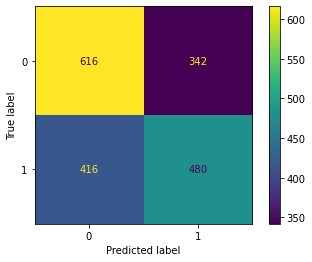

In [41]:
confusion_matrix(y_test, pred)
plot_confusion_matrix(clf, x_test, y_test)

## PYCARET

In [42]:
from pycaret.classification import *

In [45]:
eq_target.head(3)

# Certains champs n'existent pas dans eq_target et seraient utiles dans le dashboard comme :
# - Type d'emprunt (Revolving loans, etc)  -  application_train.NAME_CONTRACT_TYPE
# - Montant du crédit                      -  application_train.AMT_CREDIT
# - Annuité                                -  application_train.AMT_ANNUITY
# - Nombre d'emprunts précédents           -  
# - age                                    -  application_train.DAYS_BIRTH
# - type de revenu                         -  application_train.NAME_INCOME_TYPE
# - Revenu                                 -  application_train.AMT_INCOME_TOTAL
# - Genre                                  -  application_train.CODE_GENDER
# - Nombre d'enfants                       -  application_train.CNT_CHILDREN
# - Niveau d'éducation                     -  application_train.NAME_EDUCATION_TYPE
# - Statut familial                        -  application_train.NAME_FAMILY_STATUS          
# - Job                                    -  application_train.OCCUPATION_TYPE
# - Nombre de membre de la famille         -  application_train.CNT_FAM_MEMBERS


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              0               0                  1   
1              1               1                  1   
2              0               0                  1   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         0   
1                               0                         0   
2                               0                         0   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   
1                                     1   
2                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   
1                                                  0   
2                                                  1   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                           1                             0   
1                           1                             0   
2                           0                             0   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                        0                         0   
1                                        0                         0   
2                                        1                         0   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                    1                                      0   
1                                    1                                      0   
2                                    1                                      0   

   NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   

   NAME_HOUSING_TYPE_With parents  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                               0             2          198000.0    641173.5   
1                               0             1          540000.0    675000.0   
2                               0             0          270000.0    891072.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      23157.0         553500.0                    0.018850          47   
1      34596.0         675000.0                    0.026392          51   
2      45625.5         720000.0                    0.072508          37   

   DAYS_EMPLOYED  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           -768              4.0                     2   
1          -6977              3.0                     2   
2          -1169              1.0                     1   

   REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            2      0.842763      0.681699      0.754406   
1                            2      0.311510      0.713355      0.309275   
2                            1      0.339403      0.707972      0.452534   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       2.0                       0.0   
2                       2.0                       1.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -2411.0   
1                       2.0                       0.0                 -

### Recherche du meilleur modèle

In [43]:
# Comparaison des modèles

exp_clf102 = setup(data = eq_target, target = 'TARGET', session_id=123,
                  normalize = False,
                  transformation = False, 
                  ignore_low_variance = False,
                  remove_multicollinearity = False, 
                  multicollinearity_threshold = 0.8,
                  feature_selection = False,
                  polynomial_features = False,
                  # remove_outliers = True,
                  preprocess = False)
best_model = compare_models(fold = 10)

# Liste des paramètres:  https://pycaret.readthedocs.io/en/latest/api/classification.html
# 'data' et 'target' sont les seuls paramètres obligatoires

# Original Data	(22630, 66)
# Transformed Train Set	(15840, 65)
# Transformed Test Set	(6790, 65)  : grâce à l'option (preprocess = False),  66>65 car TARGET n'est pas pris en compte

In [44]:
print("\n", best_model)


 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [45]:
rf = create_model('rf', fold=5)
print("\n", rf)


 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [56]:
# lightgbm = create_model('lightgbm', fold=3)   # Light Gradient Boosting Machine
# print("\n", lightgbm)
#
# ValueError: DataFrame.dtypes for data must be int, float or bool.
# Did not expect the data types in the following fields: 
#     CNT_CHILDREN, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, NB_DOCUMENT, B_CNT_CREDIT_PROLONG

for col in eq_target.select_dtypes('int64'):
    print(f'{col :-<40} {eq_target[col].unique()}')

*CNT_CHILDREN---------------------------- [ 2  1  0  4  3  5 12]
 DAYS_EMPLOYED--------------------------- [ -768 -6977 -1169 ... -4595 -6207  -584]
*REGION_RATING_CLIENT-------------------- [2 1 3]
*REGION_RATING_CLIENT_W_CITY------------- [2 1 3]
*NB_DOCUMENT----------------------------- [1 0]
 B_DAYS_CREDIT--------------------------- [2639  194  875 ... 1334 1085 1116]
*B_CNT_CREDIT_PROLONG-------------------- [0 1 2 3 4 9]
 PA_DAYS_DECISION------------------------ [  23  213  741 ...  549 1657  698]


SyntaxError: invalid syntax (<ipython-input-56-09aed63a4fb0>, line 11)

In [46]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

# evaluate lightgbm algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

# define dataset
X = eq_target.drop(['TARGET'], 1)
y = eq_target['TARGET']

# define the model
lgbm = LGBMClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgbm, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

3.2.1
Accuracy: 0.945 (0.007)


### Tuning du meilleur modèle

In [46]:
# tune hyperparameters with increased n_iter
tuned_rf = tune_model(rf, optimize = 'Accuracy', fold=10)                     # Fitting 10 folds for each of 10 candidates, totalling 100 fits
# tuned_rf = tune_model(rf, optimize = 'AUC')

print("\n", tuned_rf)


 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


### Prédicion avec le meilleur modèle

In [47]:
#  1ere version

pd.set_option('display.max_row', 6000)

# 1. Prédiction sur UN individu du dataset de test ([0] => le 1er individu) :
predictions = predict_model(tuned_rf, pd.DataFrame(atest,index=[0]))

# 2. Prédiction sur TOUS les individus du dataset de test :
# predictions = predict_model(tuned_rf, atest)

# label :  étiquette(0/1)
# Score :  probabilité
predictions

# méthode de pycaret :  from pycaret.classification import *
# predict_model(tuned_rf)          # prédiction sur le dataset d'entrainement
# predict_model(tuned_rf, atest)   # prédiction sur un nouveau dataset

print("Label :", predictions.Label[0])
print("Proba :", predictions.Score[0])


Label : 0
Proba : 0.5581


In [48]:
#  2eme version

pd.set_option('display.max_row', 6000)

# Prédiction sur UN individu du dataset de test ([0] => le 1er individu) :
yhat = tuned_rf.predict(pd.DataFrame(atest,index=[0]))
print('Predicted Class: %d' % yhat[0])

# Prédiction sur TOUS les individus du dataset de test :
tuned_rf.predict_proba(pd.DataFrame(atest,index=[0]))

# label :  étiquette(0/1)
# Score :  probabilité


Predicted Class: 0


array([[0.5581271, 0.4418729]])

In [49]:
# saving model :  Crée le fichier 'rf_for_deployment.pkl'  <- impossible de charger un modèle qui marche
save_model(tuned_rf, model_name = 'rf_for_deployment')
# save_model(tuned_rf, model_name = "C:\\Users\\loic\\PycharmProjects\\projet_7\\rf_for_deployment")


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='TARGET',
                                       time_features=[])),
                 ['trained_model',
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features='log2',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.001,
                                         min_impurity_split=None,
            

In [49]:
# saving model :  Crée le fichier 'rf_for_deployment'
pickle.dump(tuned_rf, open('rf_for_deployment', 'wb'))
pickle.dump(tuned_rf, open("C:\\Users\\loic\\PycharmProjects\\projet_7\\rf_for_deployment", 'wb'))

# C:\Users\loic\PycharmProjects\projet_7\rf_for_deployment

In [50]:
# deploy model :  https://pycaret.readthedocs.io/en/latest/api/classification.html
# deploy_model(model = tuned_rf, model_name = 'rf_for_deployment', platform = 'aws', 
#              authentication = {'bucket' : 'S3-bucket-name'})


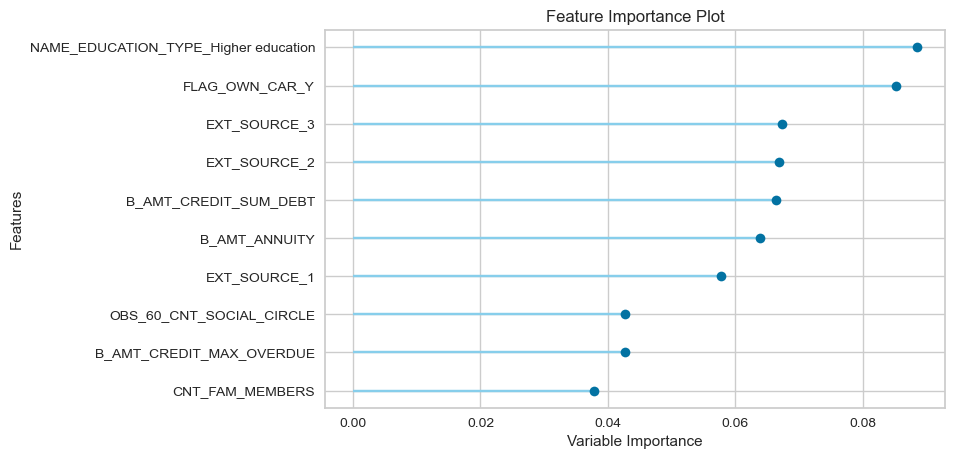

In [51]:
# Importance globale des features

plot_model(tuned_rf, plot='feature')       # Feature Importance
# plot_model(tuned_rf, plot='feature_all')   # All feature Importance

# https://pycaret.org/plot-model


In [55]:
# Importance globale des features

pd.set_option('display.max_row', 200)
pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_rf.feature_importances_)}).sort_values(by='Value', ascending=False)


Feature     Value
5                NAME_EDUCATION_TYPE_Higher education  0.087827
1                                      FLAG_OWN_CAR_Y  0.082228
31                                       EXT_SOURCE_3  0.071888
43                              B_AMT_CREDIT_SUM_DEBT  0.071453
29                                       EXT_SOURCE_1  0.069499
45                                      B_AMT_ANNUITY  0.059153
30                                       EXT_SOURCE_2  0.058278
34                           OBS_60_CNT_SOCIAL_CIRCLE  0.048885
40                           B_AMT_CREDIT_MAX_OVERDUE  0.046249
26                                    CNT_FAM_MEMBERS  0.039134
32                           OBS_30_CNT_SOCIAL_CIRCLE  0.038668
9                          NAME_FAMILY_STATUS_Married  0.026249
47                                      BB_MAX_STATUS  0.024256
13                NAME_HOUSING_TYPE_House / apartment  0.022206
8   NAME_EDUCATION_TYPE_Secondary / secondary special  0.021568
33                           DEF_30_CNT_SOCIAL_CIRCLE  0.018395
23                         REGION_POPULATION_RELATIVE  0.015888
24                                         DAYS_BIRTH  0.014981
0                                       CODE_GENDER_M  0.014437
11            NAME_FAMILY_STATUS_Single / not married  0.013088
3                      NAME_INCOME_TYPE_State servant  0.012610
35                           DEF_60_CNT_SOCIAL_CIRCLE  0.012382
18                                       CNT_CHILDREN  0.011382
36                             DAYS_LAST_PHONE_CHANGE  0.011330
2                                   FLAG_OWN_REALTY_Y  0.011041
55                                     PCB_SK_DPD_DEF  0.009058
54                                    IP_DIFF_PAYMENT  0.008396
19                                   AMT_INCOME_TOTAL  0.006391
52                                         CCB_SK_DPD  0.006300
51                                     PA_CNT_PAYMENT  0.005587
38                                      B_DAYS_CREDIT  0.004838
4                            NAME_INCOME_TYPE_Working  0.004489
10                       NAME_FAMILY_STATUS_Separated  0.004466
25                                      DAYS_EMPLOYED  0.004052
21                                        AMT_ANNUITY  0.004007
50                                   PA_DAYS_DECISION  0.003843
20                                         AMT_CREDIT  0.003822
42                                   B_AMT_CREDIT_SUM  0.003739
22                                    AMT_GOODS_PRICE  0.003159
53                                 IP_DUE_DAY_PAYMENT  0.003104
28                        REGION_RATING_CLIENT_W_CITY  0.003101
14              NAME_HOUSING_TYPE_Municipal apartment  0.002741
17                     NAME_HOUSING_TYPE_With parents  0.002619
46                                      BB_MIN_STATUS  0.002430
49                                      PA_AMT_CREDIT  0.002297
27                               REGION_RATING_CLIENT  0.001801
48                                     PA_AMT_ANNUITY  0.001761
16                 NAME_HOUSING_TYPE_Rented apartment  0.001347
6               NAME_EDUCATION_TYPE_Incomplete higher  0.001040
15                 NAME_HOUSING_TYPE_Office apartment  0.000922
37                                        NB_DOCUMENT  0.000736
44                           B_AMT_CREDIT_SUM_OVERDUE  0.000289
39                               B_CREDIT_DAY_OVERDUE  0.000251
12                           NAME_FAMILY_STATUS_Widow  0.000145
41                               B_CNT_CREDIT_PROLONG  0.000137
7                 NAME_EDUCATION_TYPE_Lower secondary  0.000061

Thresholdoptimal_idx value is: 916
TPR   optimal: 0.849
FPR   optimal: 0.121 

SEUIL optimal: 0.528


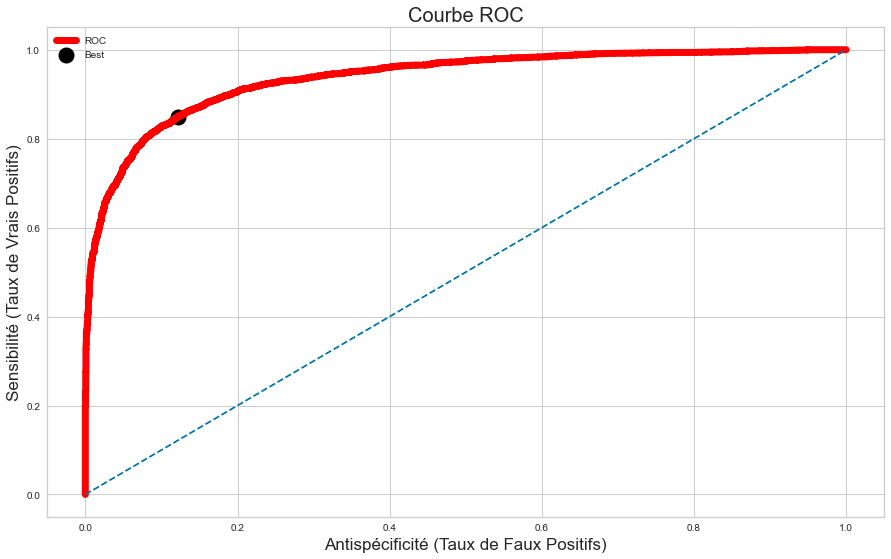

AUC: Aire sous la courbe = 0.937


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

X = eq_target.drop(['TARGET'], 1)
y = eq_target['TARGET']

# Séparation entre les données d'entrainement et les données test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

clf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
clf.fit(X_train, y_train)

# Prédiction (sur données test) que le client fasse défaut  => 2ème colonne ([:,1])
y_prob = clf.predict_proba(X_test)[:,1]   # probabilité

# Calcul des (sensibilité+antispécificité) pour chaque valeur du seuil :
[fpr, tpr, thresholds] = metrics.roc_curve(y_test, y_prob)   # compare les données test aux données prédites

# Trouver le meilleur seuil
optimal_idx = np.argmax(tpr - fpr)   # trouver les indices des plus grandes différences
print("Thresholdoptimal_idx value is:", optimal_idx)
print("TPR   optimal:", tpr[optimal_idx].round(3))
print("FPR   optimal:", fpr[optimal_idx].round(3), "\n")

optimal_threshold = thresholds[optimal_idx]
print("SEUIL optimal:", optimal_threshold.round(3))

# Affichage de la courbe ROC
fig = plt.figure(1, figsize=(15, 9))
plt.plot(fpr, tpr, color='red', label='ROC', linewidth=7)          # Taux de vrai positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--')                # diagonal du carré qui représente un classifieur aléatoire
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best', linewidth = 9)
plt.title('Courbe ROC', fontsize=20)
plt.xlabel('Antispécificité (Taux de Faux Positifs)', fontsize=17)
plt.ylabel('Sensibilité (Taux de Vrais Positifs)', fontsize=17)
plt.legend()
plt.savefig('ROC1.png',dpi=100)
plt.show()
# => On voit bien que notre classifieur performe beaucoup mieux qu'un classifieur aléatoire

# valeur de l'air sous la courbe
print("AUC: Aire sous la courbe =", metrics.auc(fpr, tpr).round(3))   # = 0.93 => Trés bon classifieur


# Sensibilité     = taux de vrais positifs TP/P = TP/TP+FN :  capacité à détecter les positifs
#   (recall = rappel)

# Spécificité     = taux de vrais négatifs TN/N = TN/TN+FP :  comptabilise les vrais negatifs par rapport à tous les negatifs
#                   Mesure complémentaire de la sensibilité qui mesure la capacité à ne pas prédire à tort un positif

# Antispécificité = taux de faux  positifs FP/P  =  (1 - Spécificité) = FP/(FP+TN)







In [53]:
print(tuned_rf)

# Bilan du modèle (avec sklearn)
pm = predict_model(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


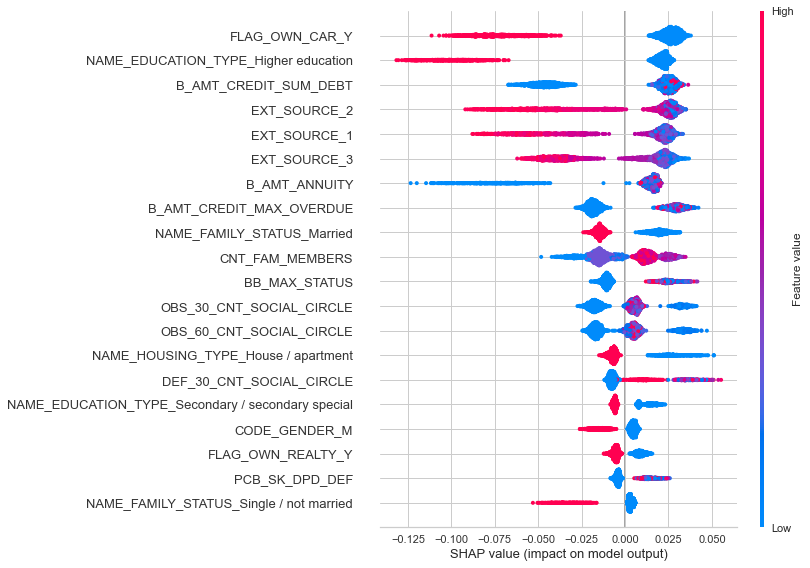

In [54]:
import shap

X = eq_target.drop(['TARGET'], 1)
y = eq_target['TARGET']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

clf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
clf.fit(train_X, train_y)


explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X)


In [68]:
at.columns
# application_train
# list(set(application_train['NAME_INCOME_TYPE']))

# at['B_AMT_CREDIT_SUM_DEBT'].mean()

Index(['CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_S

In [ ]:
application_train
application_test
bureau
bureau_balance
previous_application
POS_CASH_balance
installments_payments
credit_card_balance
sample_submission


In [63]:
Dans cette figure, les valeurs de Shap sont représentées pour chaque variable dans leur ordre d’importance.
Chaque point représente une valeur de Shap (pour un exemple).
Les points rouges représentent des valeurs élevées de la variable et les points bleus des valeurs basses de la variable.
On a ainsi une information supplémentaire sur l’impact de la variable en fonction de sa valeur.

L'emplacement horizontal indique si l'effet de cette valeur a provoqué une prédiction supérieure(à droite) ou inférieure

Ex:  
- FLAG_OWN_CAR_Y qui est la variable la plus importante, a un impact négatif quand la valeur de cette variable est élevée.
  Elévé çà veut dire 1, donc quand le client possède une voiture il a tendance a ne pas être un client par défaut (TARGET=0)
- NAME_EDUCATION_TYPE_Higher education : Même constat.
Par contre :
- B_AMT_CREDIT_SUM_DEBT :  a un impact négatif quand la valeur de cette variable est basse. Donc un client qui a peu ou pas de
  (Dette actuelle dans un autre établissement)  dette dans un autre établissement a tendance a ne pas être en défaut
- B_AMT_ANNUITY :  a un impact négatif quand la valeur de cette variable est basse.
  (Montant du remboursement annuel d'une partie du capital emprunté)
   
   

SyntaxError: invalid syntax (<ipython-input-63-944dfa7e24a3>, line 1)

In [107]:
# C'est le fichier 'rf_for_deployment' qui doit être utilisé.
#
# C:\Users\loic\PycharmProjects\projet_7\rf_for_deployment

# Chargement du modèle
mod = pickle.load(open('rf_for_deployment','rb'))         # provient de pickle.dump()
# mod = pickle.load(open('rf_for_deployment.pkl','rb'))   # KO

# Option 1
prev = mod.predict(pd.DataFrame(atest,index=[0]))    # (index=8 > label=1) ; (index=0 > label=0)
prev      # array([0])
print("Classe prédite=", prev[0])
print("Proba pour les classes 0 et 1 respectivement :", mod.predict_proba(pd.DataFrame(atest, index=[0])))
print("Avec une probabilité de :", mod.predict_proba(pd.DataFrame(atest, index=[0]))[0][prev[0]], "\n")



# Option 2
prev = predict_model(mod, pd.DataFrame(atest,index=[0]))
print("Label=", prev.Label[0])                 # Cette écriture marche avec predict_model() pas avec model.predict()
print("Score=", prev.Score[0])                 # predict_model() de pycaret
prev


Classe prédite= 0
Proba pour les classes 0 et 1 respectivement : [[0.53322645 0.46677355]]
Avec une probabilité de : 0.5332264484947014 

Label= 0
Score= 0.5332


NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0                                   0              0               0   

   FLAG_OWN_REALTY_Y  NAME_INCOME_TYPE_State servant  \
0                  1                               0   

   NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  \
0                         1                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  ...  PA_AMT_ANNUITY  \
0                                                  1  ...        8091.585   

   PA_AMT_CREDIT  PA_DAYS_DECISION  PA_CNT_PAYMENT  CCB_SK_DPD  \
0        92920.5               531       11.333333         0.0   

   IP_DUE_DAY_PAYMENT  IP_DIFF_PAYMENT  PCB_SK_DPD_DEF  Label   Score  
0                 3.0      -622.550708             0.0      0  0.5332  

[1 rows x 76 columns]

In [102]:
tab = mod.predict_proba(pd.DataFrame(atest, index=[8]))
tab   # array([[0.45815273, 0.54184727]])
tab[0][0]

0.45815273484351526

In [93]:
mod.predict_proba(atest)[8]


array([0.45815273, 0.54184727])

In [90]:
prev = predict_model(mod, atest)
prev

# Dans ce dataframe, aucun score n'est inf à 0.5
# Il est affiché pour chacun des clients, le label gagnant avec sa probabilité associée qui est forcément > 0.5


NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0                                      0              0               0   
1                                      0              0               1   
2                                      0              1               1   
3                                      0              0               1   
4                                      0              0               1   
5                                      0              0               1   
6                                      0              0               0   
7                                      0              1               1   
8                                      0              0               1   
9                                      0              0               0   
10                                     0              0               0   
11                                     0              0               0   
12                                     0              0               0   
13                                     0              0               0   
14                                     0              1               0   
15                                     0              1               1   
16                                     0              1               0   
17                                     0              1               1   
18                                     0              1               0   
19                                     0              0               1   
20                                     0              1               1   
21                                     0              0               0   
22                                     0              0               0   
23                                     0              1               1   
24                                     0              0               1   
25                                     0              1               1   
26                                     0              0               0   
27                                     0              0               0   
28                                     0              1               1   
29                                     0              1               0   
30                                     0              0               0   
31                                     0              0               0   
32                                     0              0               0   
33                                     0              0               0   
34                                     0              0               0   
35                                     0              0               0   
36                                     0              0               1   
37                                     0              0               0   
38                                     0              1               1   
39                                     0              0               0   
40                                     0              0               1   
41                                     0              1               0   
42                                     0              0               1   
43                                     0              0               1   
44                                     0              0               1   
45                                     0              1               0   
46                                     0              0               0   
47                                     0              1               0   
48                                     0              0               0   
49                                     0              0               1   
50                                     0              0               0   
51                                     0              0               0   
52                             

In [91]:
prev[prev['Score'] < 0.5]

Empty DataFrame
Columns: [NAME_CONTRACT_TYPE_Revolving loans, CODE_GENDER_M, FLAG_OWN_CAR_Y, FLAG_OWN_REALTY_Y, NAME_INCOME_TYPE_State servant, NAME_INCOME_TYPE_Working, NAME_EDUCATION_TYPE_Higher education, NAME_EDUCATION_TYPE_Incomplete higher, NAME_EDUCATION_TYPE_Lower secondary, NAME_EDUCATION_TYPE_Secondary / secondary special, NAME_FAMILY_STATUS_Married, NAME_FAMILY_STATUS_Separated, NAME_FAMILY_STATUS_Single / not married, NAME_FAMILY_STATUS_Widow, NAME_HOUSING_TYPE_House / apartment, NAME_HOUSING_TYPE_Municipal apartment, NAME_HOUSING_TYPE_Office apartment, NAME_HOUSING_TYPE_Rented apartment, NAME_HOUSING_TYPE_With parents, OCCUPATION_TYPE_Cleaning staff, OCCUPATION_TYPE_Cooking staff, OCCUPATION_TYPE_Core staff, OCCUPATION_TYPE_Drivers, OCCUPATION_TYPE_HR staff, OCCUPATION_TYPE_High skill tech staff, OCCUPATION_TYPE_IT staff, OCCUPATION_TYPE_Laborers, OCCUPATION_TYPE_Low-skill Laborers, OCCUPATION_TYPE_Managers, OCCUPATION_TYPE_Medicine staff, OCCUPATION_TYPE_Private service staff, OCCUPATION_TYPE_Realty agents, OCCUPATION_TYPE_Sales staff, OCCUPATION_TYPE_Secretaries, OCCUPATION_TYPE_Security staff, OCCUPATION_TYPE_Waiters/barmen staff, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, NB_DOCUMENT, B_DAYS_CREDIT, B_CREDIT_DAY_OVERDUE, B_AMT_CREDIT_MAX_OVERDUE, B_CNT_CREDIT_PROLONG, B_AMT_CREDIT_SUM, B_AMT_CREDIT_SUM_DEBT, B_AMT_CREDIT_SUM_OVERDUE, B_AMT_ANNUITY, BB_MIN_STATUS, BB_MAX_STATUS, PA_AMT_ANNUITY, PA_AMT_CREDIT, PA_DAYS_DECISION, PA_CNT_PAYMENT, CCB_SK_DPD, IP_DUE_DAY_PAYMENT, IP_DIFF_PAYMENT, PCB_SK_DPD_DEF, Label, Score]
Index: []

[0 rows x 76 columns]

In [84]:
mod

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [65]:
from sklearn.ensemble import RandomForestClassifier

X = eq_target.drop(['TARGET'], 1)
y = eq_target['TARGET']
clf=RandomForestClassifier()
clf.fit(X, y)

prediction=clf.predict(pd.DataFrame(atest, index=[0]))   # numpy.ndarray :  array([0], dtype=int64)
prediction

clf.predict_log_proba(pd.DataFrame(atest, index=[0]))    # array([[-0.12783337, -2.12026354]])

clf.predict_proba(pd.DataFrame(atest, index=[0]))        # array([[0.9, 0.1]]) -> Pourquoi 2 valeurs




array([[0.71, 0.29]])

In [ ]:
# deploy_model(model = tuned_etc, model_name = 'etc_aws', platform = 'aws', 
#              authentication =  {'bucket'  : 'pycaret-test'})

In [ ]:
pip install streamlit

en tenant en compte du déséquilibre des classes de la variable cible (utiliser la librairie pycaret)
Pycaret : https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46 https://www.streamlit.io/
streamlit : Tres simple, très pythonique, pour faire des visualisations interactives


## Rappel sur precision, recall, f1-score, AUC

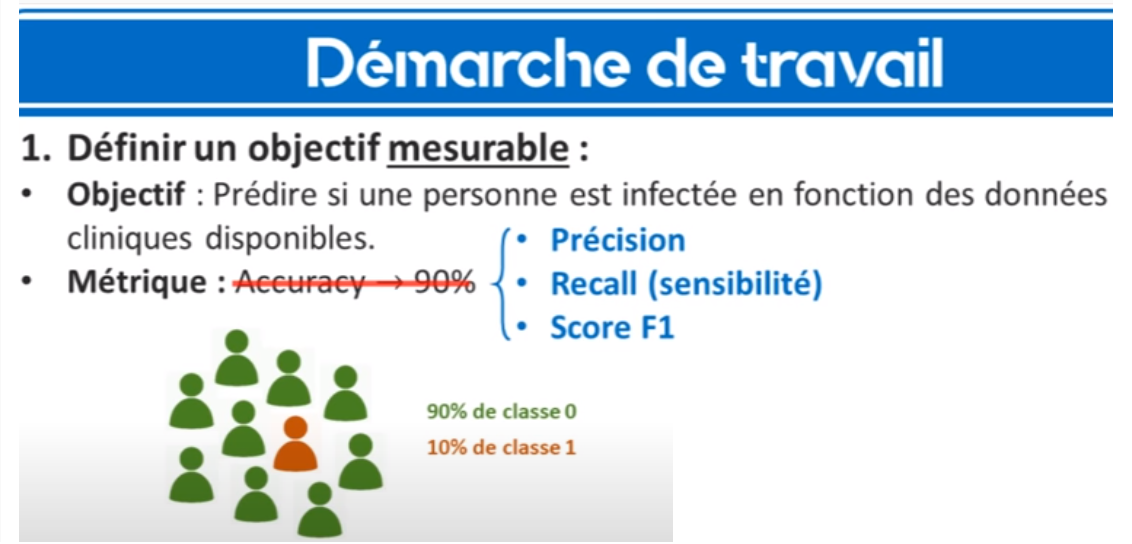

In [22]:
from IPython.display import Image
Image(filename='demarche_travail.png', width=700, height=700)

# L'accuracy n'est pas efficace dans le cas de classes déséquilibrées. D'autres métriques doivent être choisies.
# F1 = precision/recall


Pycaret nous donne les indices:  [Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC]
    

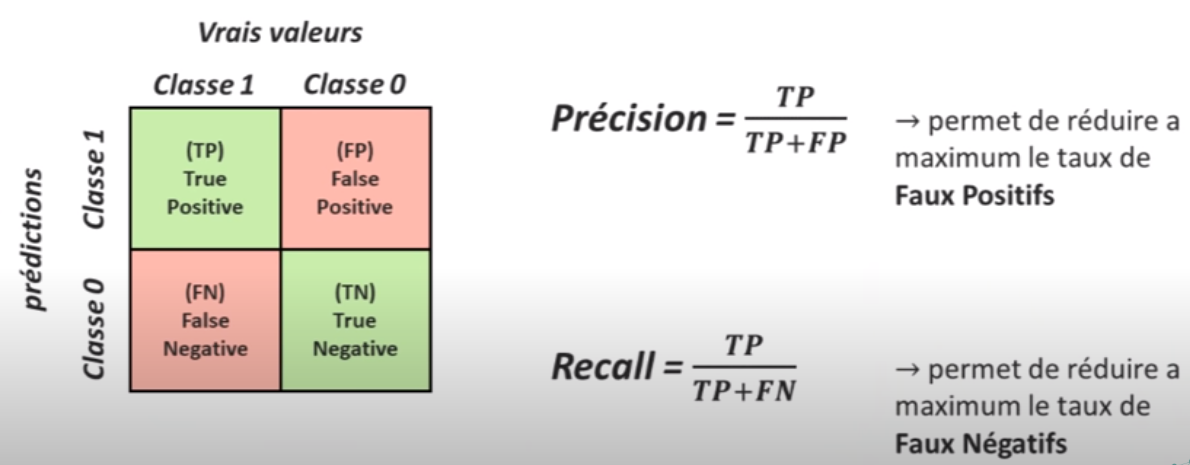

In [23]:
from IPython.display import Image
Image(filename='precision_recall.png', width=700, height=700)

# Précision, Recall, F1(= precision/recall)   <-- calculés à partir d'une matrice de confusion.


In [ ]:
# /Documents/FORMATION/Data%20Scientist/evaluezPerformancesModeleMachineLearning/evaluez.ipynb

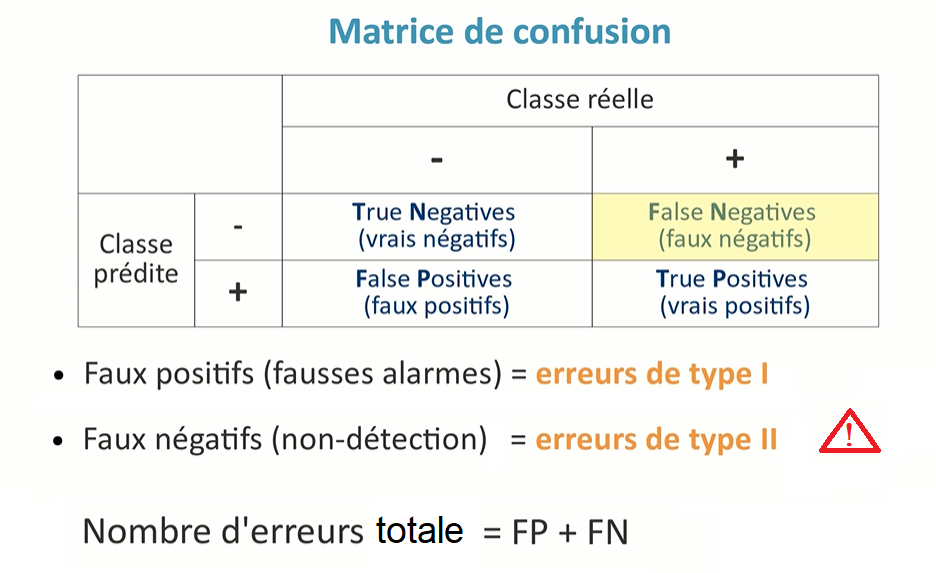

In [24]:
from IPython.display import Image
Image(filename='matriceConfusion3.png', width=700, height=700)


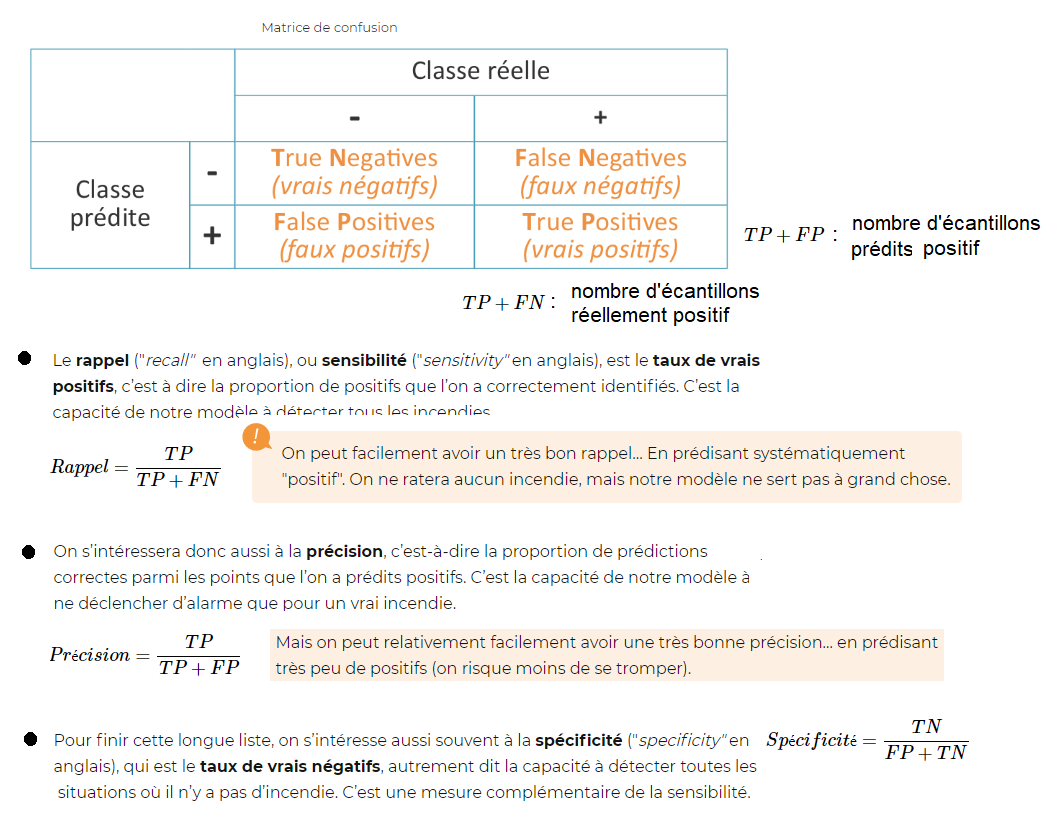

In [25]:
from IPython.display import Image
Image(filename='matriceConfusion.png', width=800, height=800)

# À partir de la matrice de confusion on peut dériver tout un tas de critères de performance, comme par exemple :

In [ ]:

# Sensibilité     = taux de vrais positifs TP/P = TP/TP+FN :  capacité à détecter les positifs
#   (recall = rappel)

# précision       = capacité à identifier les positifs sans se tromper (sous-entendu qu'il y a des Faux Positifs)
#                 = TP/(TP+FP) 

# F1              = precision/recall = TP+FP/TP+FN 

# Spécificité     = taux de vrais négatifs TN/N = TN/TN+FP :  comptabilise les vrais negatifs par rapport à tous les negatifs
#                   Mesure complémentaire de la sensibilité qui mesure la capacité à ne pas prédire à tort un positif

# Antispécificité = taux de faux  positifs FP/P  =  (1 - Spécificité) = FP/(FP+TN)

# Un modèle parfait va systématiquement associer des valeurs plus faibles aux exemples négatifs qu’aux exemples positifs.
# Ben Oui, si un point (-) a une valeur forte, il va vite apparaître comme positif si on descent le seuil,
#   alors qu'il est réellement négatif. En fait c'est un faux positif qui provoque une marche dans la courbe ROC.
# La courbe ROC d'un modèle parfait dessine donc le coin supérieur gauche du carré.

# taux de faux négatifs = 1 − sensibilité


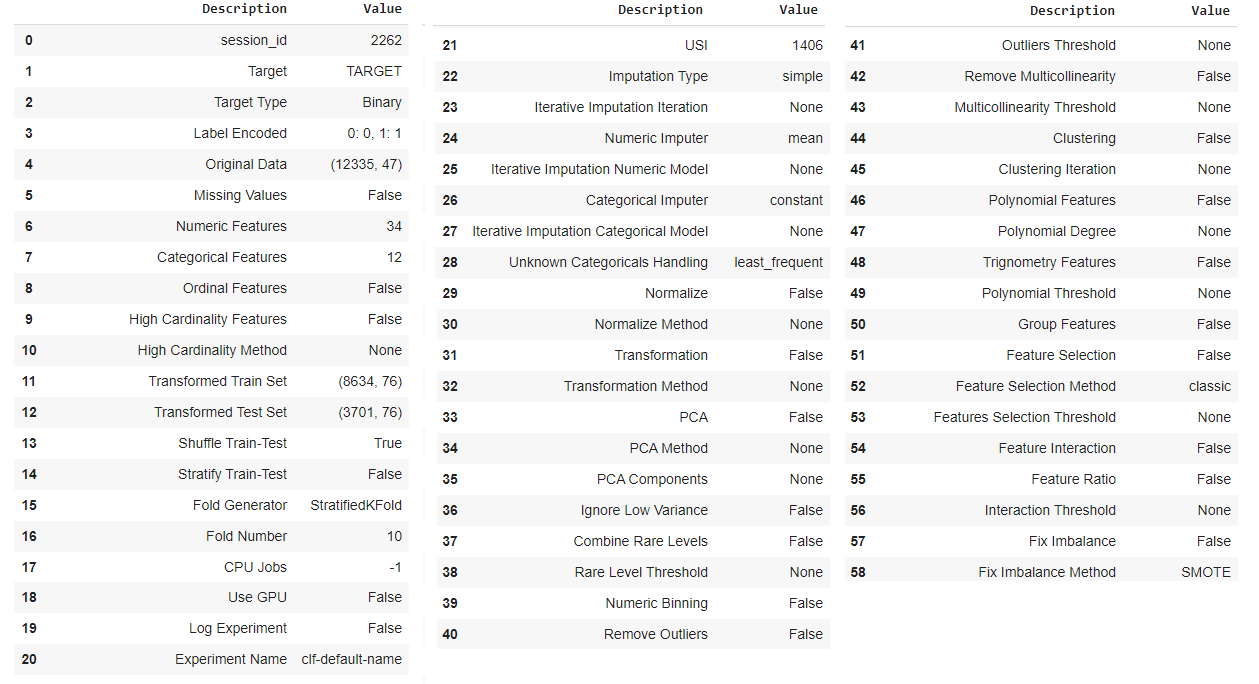

In [66]:
from IPython.display import Image
Image(filename='etap1.png', width=1000, height=1000)

# Documentattion

In [ ]:
http://tutoriels-data-mining.blogspot.com/2008/03/ciblage-marketing-scoring-coil.html
    
https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308261-evaluez-un-algorithme-de-classification-qui-retourne-des-scores

https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/5868296-transformez-des-besoins-metiers-en-problemes-de-machine-learning

https://openclassrooms.com/fr/courses/4762856-analysez-des-donnees-marketing/5525761-segmentez-votre-base-clients

scoring openclassroom    
    
Scoring et détection de fraude >> je connais un outil de machine learning en python. Il se nomme "creme"

https://beranger.medium.com/ml-accuracy-pr%C3%A9cision-f1-score-courbe-roc-que-choisir-5d4940b854d7

Pycaret : https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46 
https://www.streamlit.io/

In [78]:
'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1',
'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NB_DOCUMENT',
'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE',
'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT',
'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY', 'BB_MIN_STATUS',
'BB_MAX_STATUS', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION',
'PA_CNT_PAYMENT', 'CCB_SK_DPD', 'IP_DUE_DAY_PAYMENT', 'IP_DIFF_PAYMENT',
'PCB_SK_DPD_DEF'

'NAME_CONTRACT_TYPE',   # pas pour le modéle mais pour le dashboard
 OCCUPATION_TYPE',      # pas pour le modéle mais pour le dashboard
    
    
A afficher dans le dashboard :
# - age                             -  DAYS_BIRTH
# - type de revenu                  -  NAME_INCOME_TYPE
# - Revenu                          -  AMT_INCOME_TOTAL
# - Type d'emprunt                  -  NAME_CONTRACT_TYPE
#     (Revolving loans, etc)
# - Montant du crédit               -  AMT_CREDIT    
# - Annuité                         -  AMT_ANNUITY
# - Nombre d'emprunts précédents    -  ? actif ou inactif


# Selon SHAP, les facteurs influants sont :
# - NAME_EDUCATION_TYPE
# - FLAG_OWN_CAR
# - CNT_FAM_MEMBERS
# - NAME_FAMILY_STATUS
# - CNT_CHILDREN
# - 

# reste à afficher :
# - image: probabilité de défaut du crédit
# - image: facteurs influants
# - image: répartitions des infos prise en compte selon la table source



In [ ]:
# Certains champs n'existent pas dans eq_target et seraient utiles dans le dashboard comme :
# - Type d'emprunt (Revolving loans, etc)  -  application_train.NAME_CONTRACT_TYPE
# - Montant du crédit                      -  application_train.AMT_CREDIT
# - Annuité                                -  application_train.AMT_ANNUITY
# - Nombre d'emprunts précédents           -  
# - age                                    -  application_train.DAYS_BIRTH
# - type de revenu                         -  application_train.NAME_INCOME_TYPE
# - Revenu                                 -  application_train.AMT_INCOME_TOTAL
# - Genre                                  -  application_train.CODE_GENDER
# - Nombre d'enfants                       -  application_train.CNT_CHILDREN
# - Niveau d'éducation                     -  application_train.NAME_EDUCATION_TYPE
# - Statut familial                        -  application_train.NAME_FAMILY_STATUS          
# - Job                                    -  application_train.OCCUPATION_TYPE
# - Nombre de membre de la famille         -  application_train.CNT_FAM_MEMBERS
